In [1]:
MERCHAINDISE = 'LTCUSDT'
DAYS = 120
START_DATE = '2021-9-7'
END_DATE = '2021-9-28'
    

### BOOKMARK

Go to <a href=#bookmark1>1 hour</a>

In [2]:
# Private function

def report_by_hour(hour): 
    hour_observe = hour
    data_prices_str = f"data_prices_{hour_observe}"
    type_continuous_str = f"type_continuous_{hour_observe}"

    data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
    data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

    print(f"Giờ {hour_observe}")
    print("________________________________")
    print(data_prices_up['hour_return'].describe())
    print(data_prices_up['hour_return'].sum())


    print("+++")
    print(data_prices_down['hour_return'].describe())
    print(data_prices_down['hour_return'].sum())

    data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


    print('____________________________________________________________')

    data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]

    data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

    type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

    labels = type_continuous_group.index.values
    sizes = type_continuous_group.values

    plt.figure()
    fig1, ax1 = plt.subplots(figsize=(12, 7))
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.legend()
    plt.show()

    print(type_continuous_group)

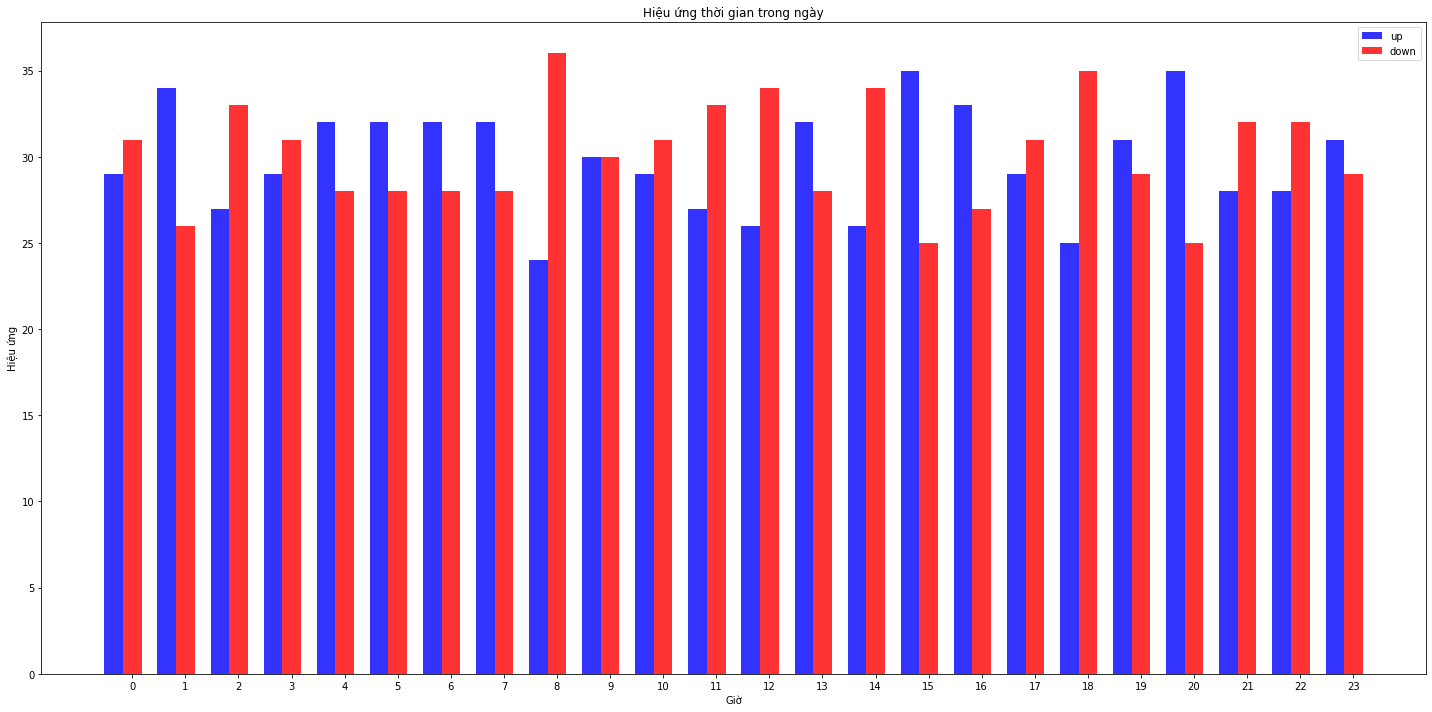

______________________________Hour return____________________________
________________________________
count    716.000000
mean       0.766742
std        0.842152
min        0.000000
25%        0.229213
50%        0.509307
75%        0.978094
max        6.996047
Name: hour_return, dtype: float64
548.9871427522284
+++
count    724.000000
mean      -0.762587
std        0.812097
min       -7.904192
25%       -0.968203
50%       -0.549451
75%       -0.255820
max       -0.039108
Name: hour_return, dtype: float64
-552.1127614489928
______________________________Loại tiếp diễn____________________________


<Figure size 720x720 with 0 Axes>

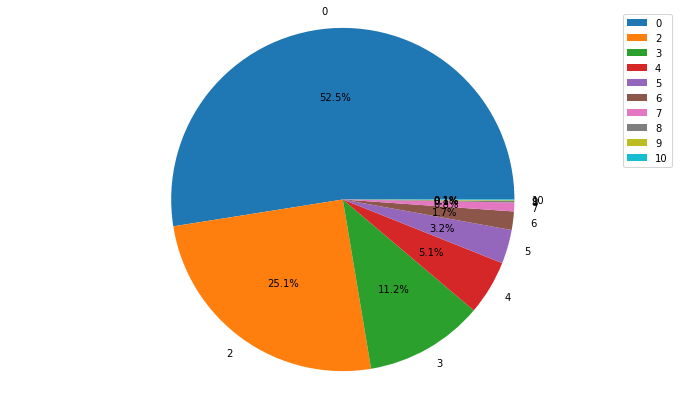

type_continuous
0     756
2     362
3     161
4      74
5      46
6      25
7      12
8       2
9       1
10      1
dtype: int64
______________________________Thời gian biến động nhất____________________________


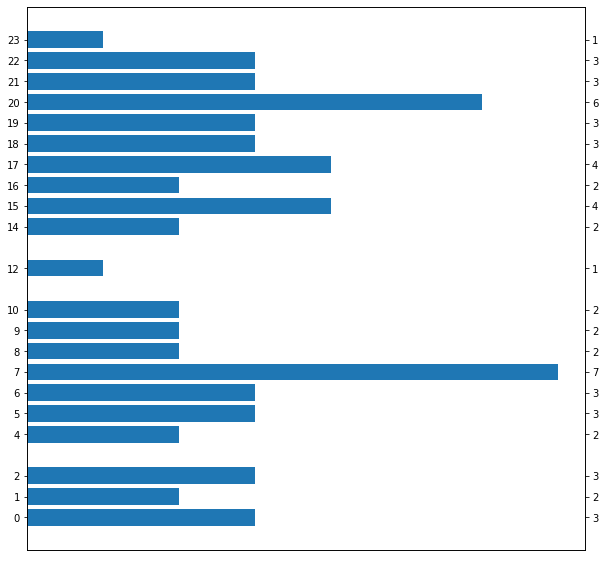

In [3]:
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change, candlestick_type, type_continuous, until_now_type, candlestick_type_by_hour
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug(MERCHAINDISE)
candlestick = Candlestick(merchandise_rate_id, 'hour', 24*DAYS, "DESC")
# candlestick = Candlestick(merchandise_rate_id, 'hour', 24*50, "DESC", start_date='2021-9-7', end_date='2021-9-28')

data_prices = candlestick.to_df()


# data_prices['hour_return'] = percentage_change(data_prices, LOW_INDEX, HIGH_INDEX)
# data_prices['hour_return'] = data_prices['close'].pct_change() * 100
data_prices['hour_return'] = percentage_change(data_prices,OPEN_INDEX, CLOSE_INDEX)
data_prices['day'] = data_prices[['open']].apply(
    lambda x: x.name.strftime("%Y-%m-%d"), axis=1)
data_prices['hour'] = data_prices[['open']].apply(
    lambda x: x.name.hour, axis=1)

total = data_prices.iloc[:, 0].count()
first_date = data_prices.iloc[0].name.date()
last_date = data_prices.iloc[-1].name.date()

data_prices['type'] = candlestick_type(data_prices)
data_prices['type_continuous'] = type_continuous(data_prices)

index = np.arange(24)
bar_width = 0.35
opacity = 0.8

x = ()
y = ()


for i in np.arange(24):
    data_prices_x = data_prices[data_prices['hour'] == i]

    number_up = len(data_prices_x[data_prices_x['type'] == 'up'])
    number_down = len(data_prices_x[data_prices_x['type'] == 'down'])

    x = x + (number_up,)
    y = y + (number_down,)


plt.figure(figsize=[20,10])
plt.rcParams['figure.figsize'] = [10, 10]

rects1 = plt.bar(index, x, bar_width,
                 alpha=opacity, color='b', label='up')

rects2 = plt.bar(index + bar_width, y, bar_width,
                 alpha=opacity, color='r', label='down')
plt.xlabel('Giờ')
plt.ylabel('Hiệu ứng')
plt.title(
    f"Hiệu ứng thời gian trong ngày")
plt.xticks(index + bar_width, tuple(np.arange(24)))
plt.legend()
plt.tight_layout()
plt.show()


data_prices_up = data_prices[data_prices['type'] == 'up']
data_prices_down = data_prices[data_prices['type'] == 'down']

print("______________________________Hour return____________________________")

print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())


print("______________________________Loại tiếp diễn____________________________")

type_continuous_group = data_prices.groupby(['type_continuous']).size()


labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)


print("______________________________Thời gian biến động nhất____________________________")


def highest_in_day(x):
    max = data_prices[data_prices.day == x.day].hour_return.max()
    return data_prices[(data_prices.day == x.day) & (data_prices.hour_return == max)].hour.iat[0]


data_prices['highest_in_day'] = data_prices[[
    'day']].apply(lambda x: highest_in_day(x), axis=1)

highest_in_day_group = data_prices.groupby(
    'day').mean().groupby('highest_in_day').count()


list_hours = [int(hour) for hour in highest_in_day_group.index.values.tolist()]
list_highest_in_day = highest_in_day_group['hour'].tolist()

plt.rcParams['figure.figsize'] = [10, 10]

fig, ax = plt.subplots()
ax.barh(list_hours, list_highest_in_day, align='center')

ax.set_yticks(list_hours)
ax.set_yticklabels(list_hours)
ax.set_xticks([])

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(list_hours)
ax2.set_yticklabels(list_highest_in_day)

plt.show()


Giờ 1
________________________________
count    34.000000
mean      0.692238
std       0.988730
min       0.000000
25%       0.206494
50%       0.334269
75%       0.750141
max       4.958295
Name: hour_return, dtype: float64
23.536103334831125
+++
count    26.000000
mean     -0.597532
std       0.443437
min      -1.477651
25%      -0.942270
50%      -0.493749
75%      -0.224606
max      -0.051203
Name: hour_return, dtype: float64
-15.535829496755948
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


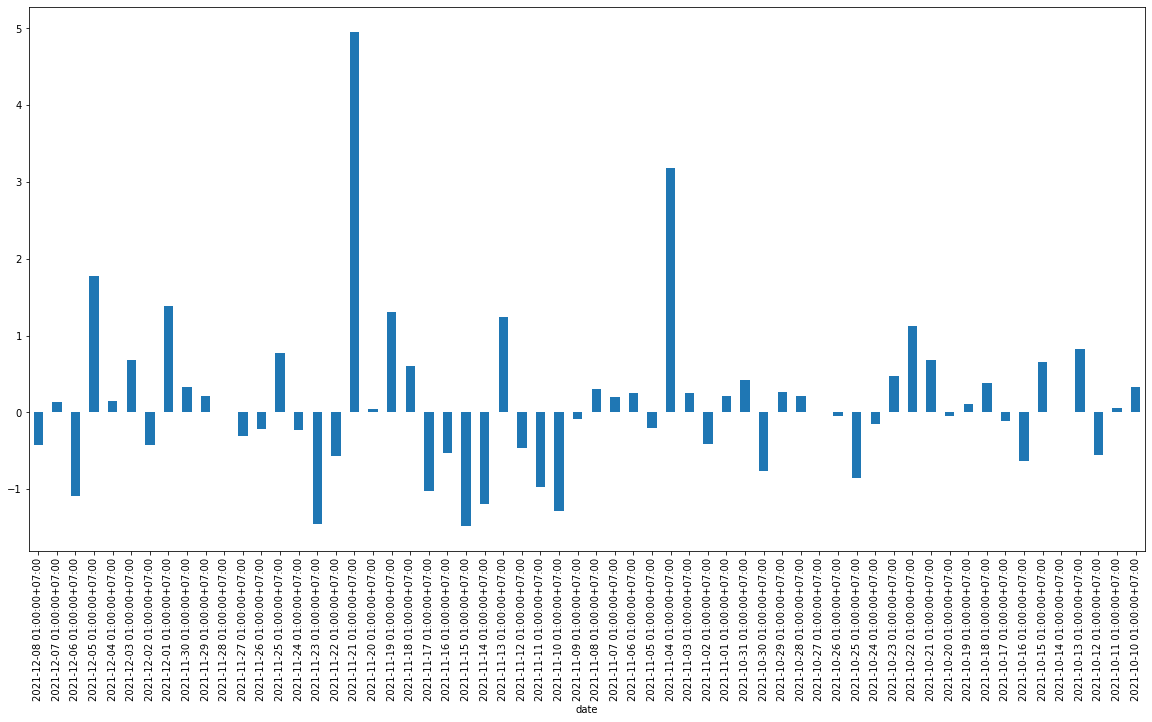

<Figure size 720x720 with 0 Axes>

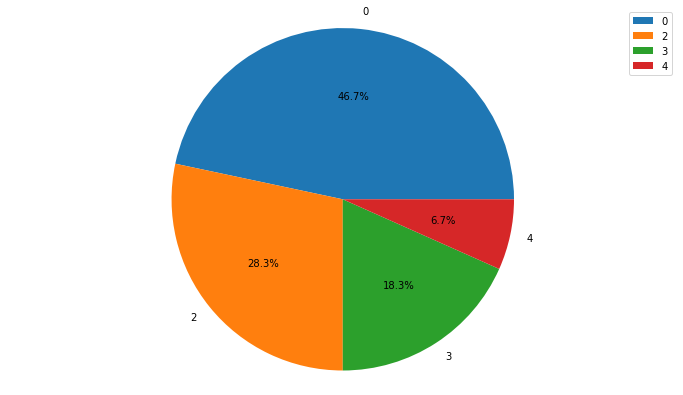

type_continuous_1
0    28
2    17
3    11
4     4
dtype: int64


In [4]:
hour_observe = 1
data_price_1 = data_prices[(data_prices['hour'] == hour_observe)]
report_by_hour(hour_observe)


Left off here <a name='bookmark1'> test </a>

Giờ 2
________________________________
count    27.000000
mean      0.803926
std       0.615321
min       0.000000
25%       0.391012
50%       0.790514
75%       1.075714
max       2.306733
Name: hour_return, dtype: float64
21.70601529216585
+++
count    33.000000
mean     -0.660685
std       0.613996
min      -2.673522
25%      -0.845070
50%      -0.506428
75%      -0.240616
max      -0.052301
Name: hour_return, dtype: float64
-21.80260201883459
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


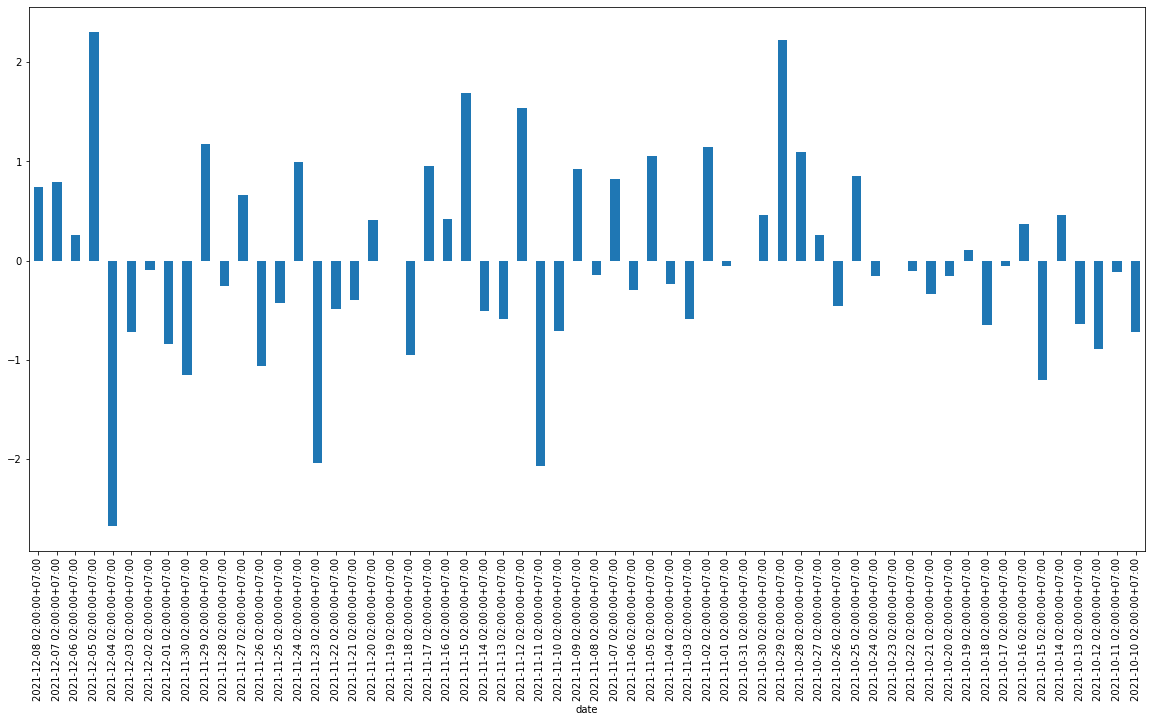

<Figure size 720x720 with 0 Axes>

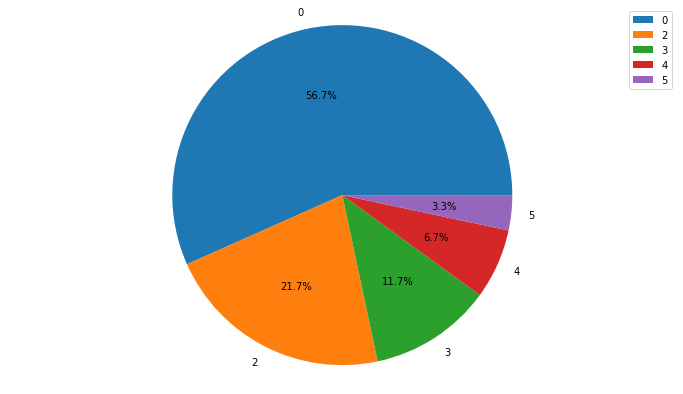

type_continuous_2
0    34
2    13
3     7
4     4
5     2
dtype: int64


In [5]:
hour_observe = 2

data_price_2 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 3
________________________________
count    29.000000
mean      0.521027
std       0.358132
min       0.000000
25%       0.324465
50%       0.488672
75%       0.836320
max       1.203659
Name: hour_return, dtype: float64
15.109781276382266
+++
count    31.000000
mean     -0.811203
std       0.752311
min      -2.717391
25%      -1.111302
50%      -0.549451
75%      -0.219216
max      -0.044326
Name: hour_return, dtype: float64
-25.147293318518987
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


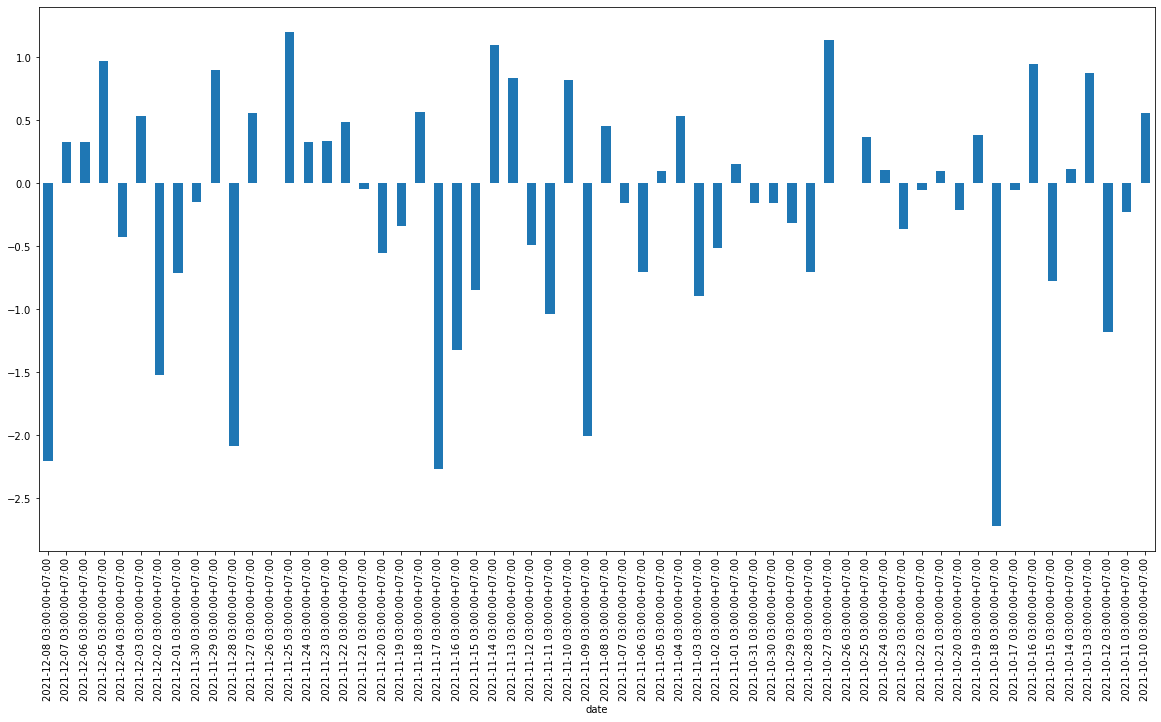

<Figure size 720x720 with 0 Axes>

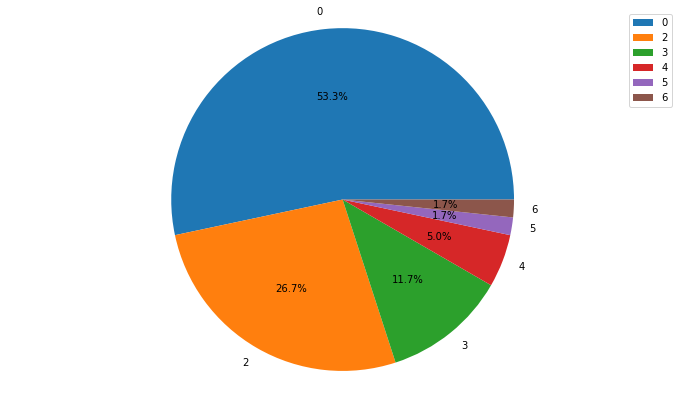

type_continuous_3
0    32
2    16
3     7
4     3
5     1
6     1
dtype: int64


In [6]:
hour_observe = 3

data_price_3 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 4
________________________________
count    32.000000
mean      0.703103
std       0.834764
min       0.000000
25%       0.235187
50%       0.427463
75%       0.756946
max       3.515625
Name: hour_return, dtype: float64
22.499290158572805
+++
count    28.000000
mean     -0.845852
std       1.265877
min      -6.632838
25%      -0.929285
50%      -0.391046
75%      -0.224417
max      -0.046019
Name: hour_return, dtype: float64
-23.683859126697808
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


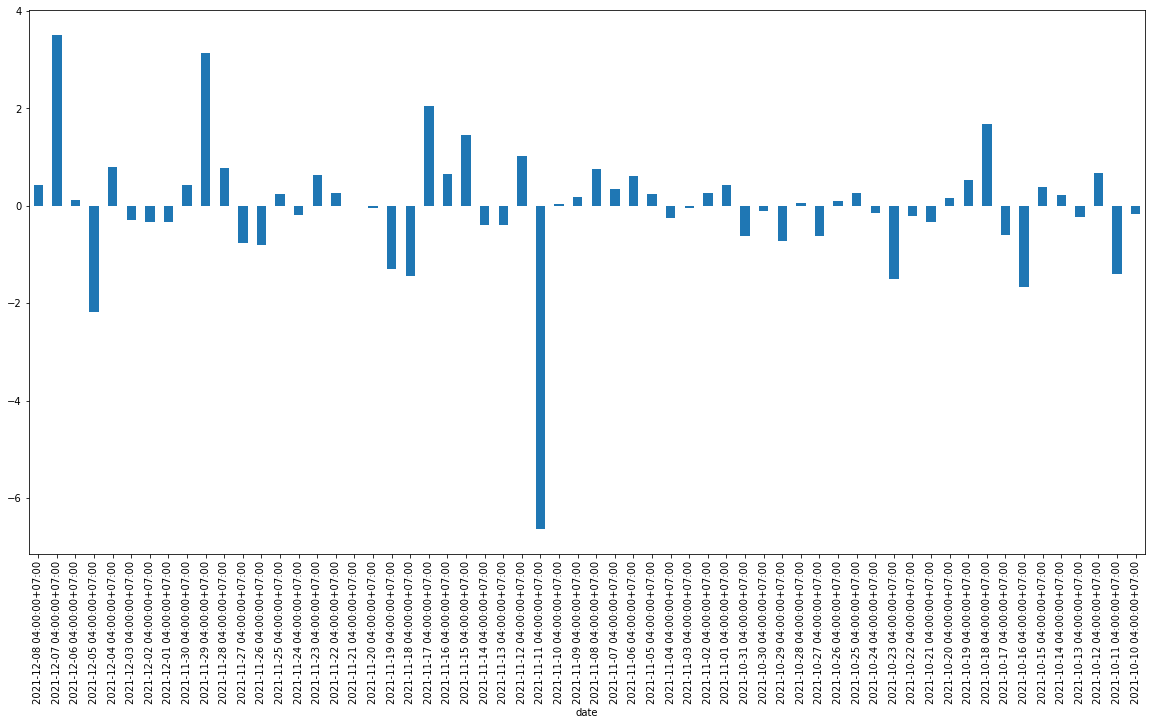

<Figure size 720x720 with 0 Axes>

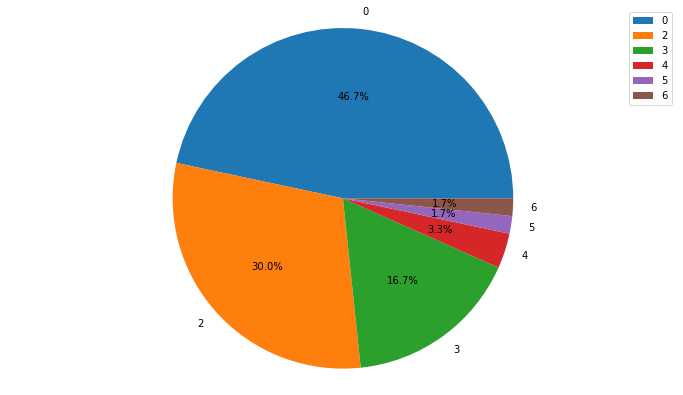

type_continuous_4
0    28
2    18
3    10
4     2
5     1
6     1
dtype: int64


In [7]:
hour_observe = 4

data_price_4 = data_prices[(data_prices['hour'] == hour_observe)]


report_by_hour(hour_observe)

Giờ 5
________________________________
count    32.000000
mean      0.773626
std       0.612736
min       0.052659
25%       0.431824
50%       0.645859
75%       0.996979
max       2.955975
Name: hour_return, dtype: float64
24.75603484577269
+++
count    28.000000
mean     -0.539736
std       0.423842
min      -1.670040
25%      -0.787640
50%      -0.435572
75%      -0.219538
max      -0.042845
Name: hour_return, dtype: float64
-15.11260938799764
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


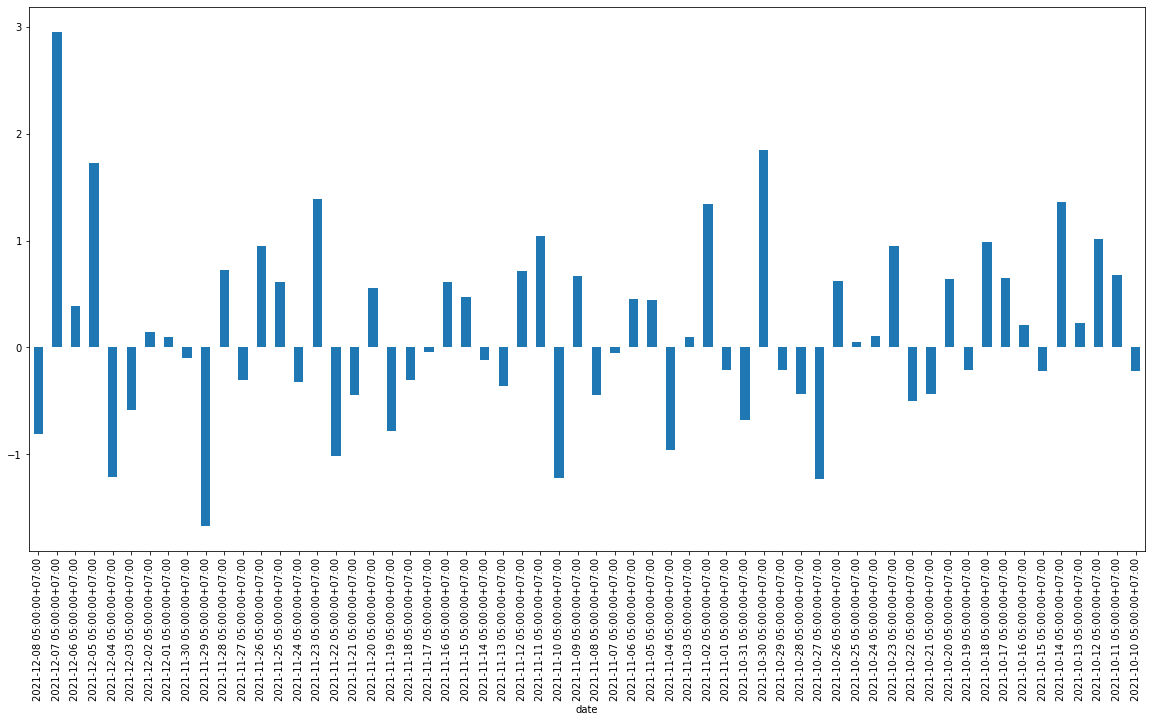

<Figure size 720x720 with 0 Axes>

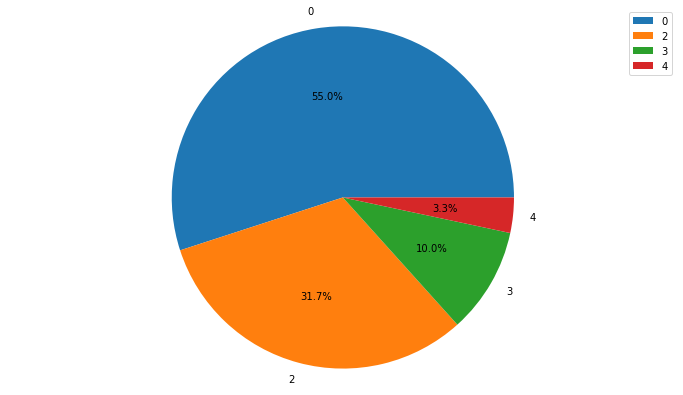

type_continuous_5
0    33
2    19
3     6
4     2
dtype: int64


In [8]:
hour_observe = 5

data_price_5 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 6
________________________________
count    32.000000
mean      0.692940
std       0.700235
min       0.000000
25%       0.242890
50%       0.556040
75%       0.832020
max       2.702703
Name: hour_return, dtype: float64
22.174071156355833
+++
count    28.000000
mean     -0.727760
std       0.596010
min      -1.914661
25%      -1.306216
50%      -0.619726
75%      -0.163027
max      -0.052083
Name: hour_return, dtype: float64
-20.377274003570243
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


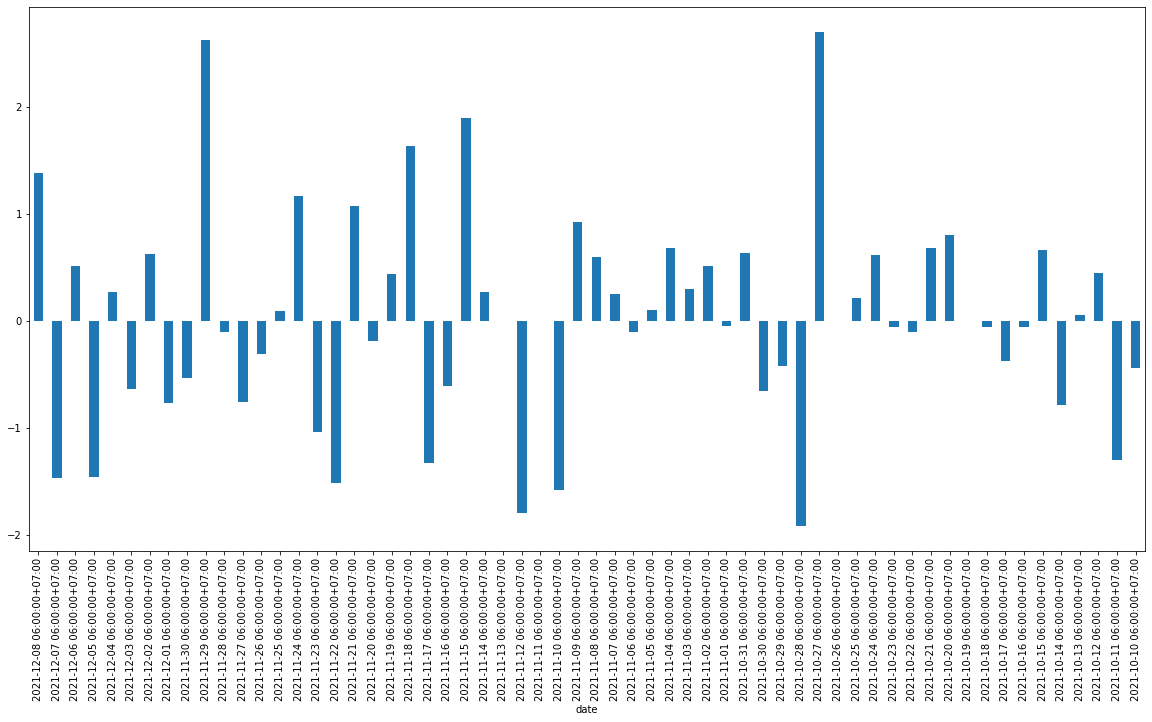

<Figure size 720x720 with 0 Axes>

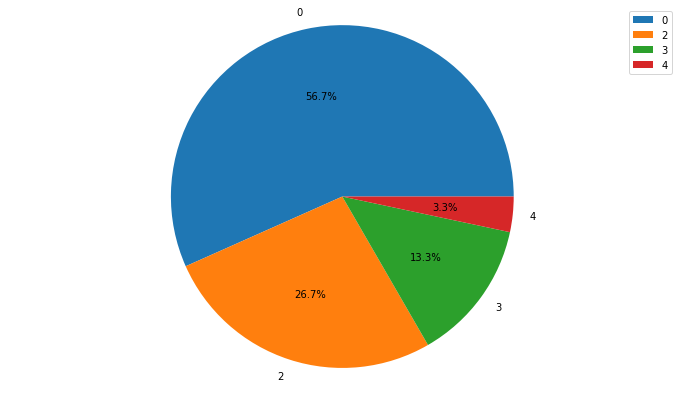

type_continuous_6
0    34
2    16
3     8
4     2
dtype: int64


In [9]:
hour_observe = 6

data_price_6 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 7
________________________________
count    32.000000
mean      1.121526
std       0.758702
min       0.045893
25%       0.652727
50%       0.913402
75%       1.516866
max       3.711790
Name: hour_return, dtype: float64
35.88881765661114
+++
count    28.000000
mean     -1.042061
std       0.893760
min      -3.992395
25%      -1.304503
50%      -0.842566
75%      -0.374602
max      -0.168824
Name: hour_return, dtype: float64
-29.17771580215147
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


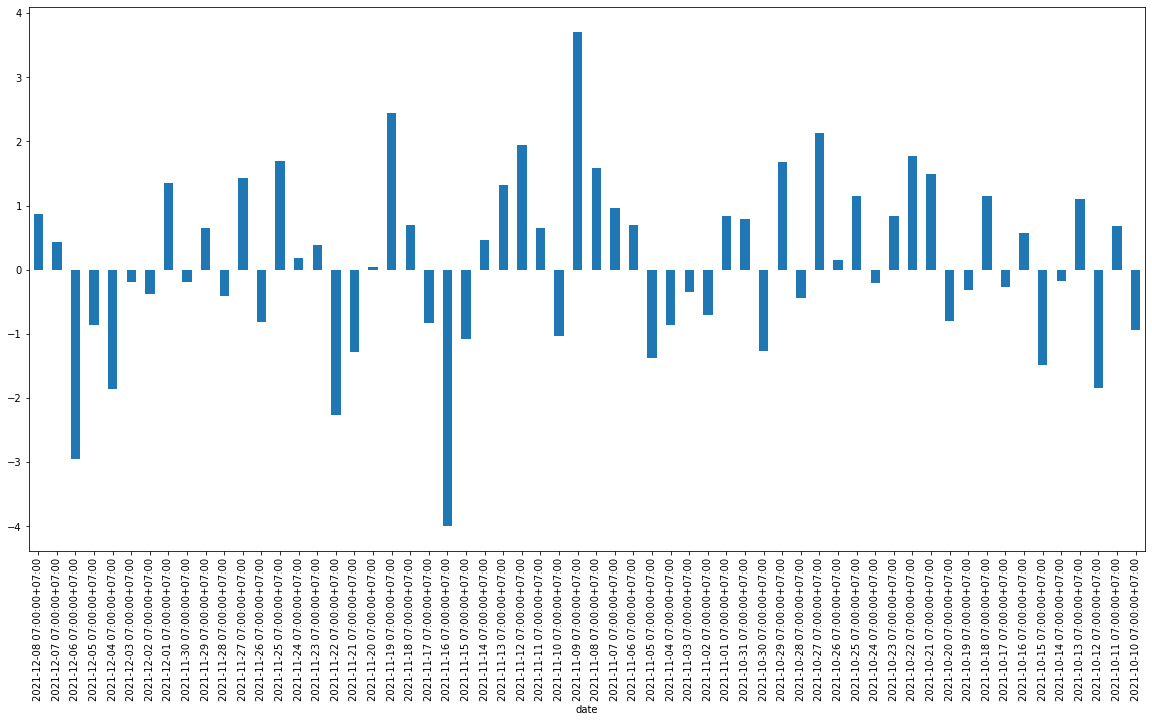

<Figure size 720x720 with 0 Axes>

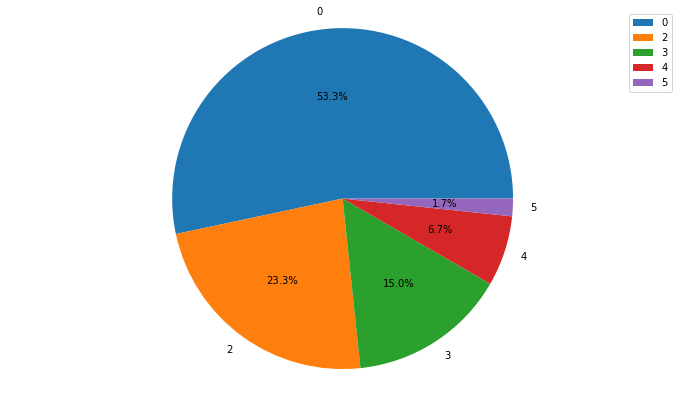

type_continuous_7
0    32
2    14
3     9
4     4
5     1
dtype: int64


In [10]:
hour_observe = 7

data_price_7 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 8
________________________________
count    24.000000
mean      0.826053
std       0.827985
min       0.051813
25%       0.195974
50%       0.498560
75%       1.278331
max       2.729993
Name: hour_return, dtype: float64
19.825261187818768
+++
count    36.000000
mean     -0.665368
std       0.593578
min      -2.594340
25%      -0.868158
50%      -0.489480
75%      -0.299687
max      -0.045208
Name: hour_return, dtype: float64
-23.95325052379596
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


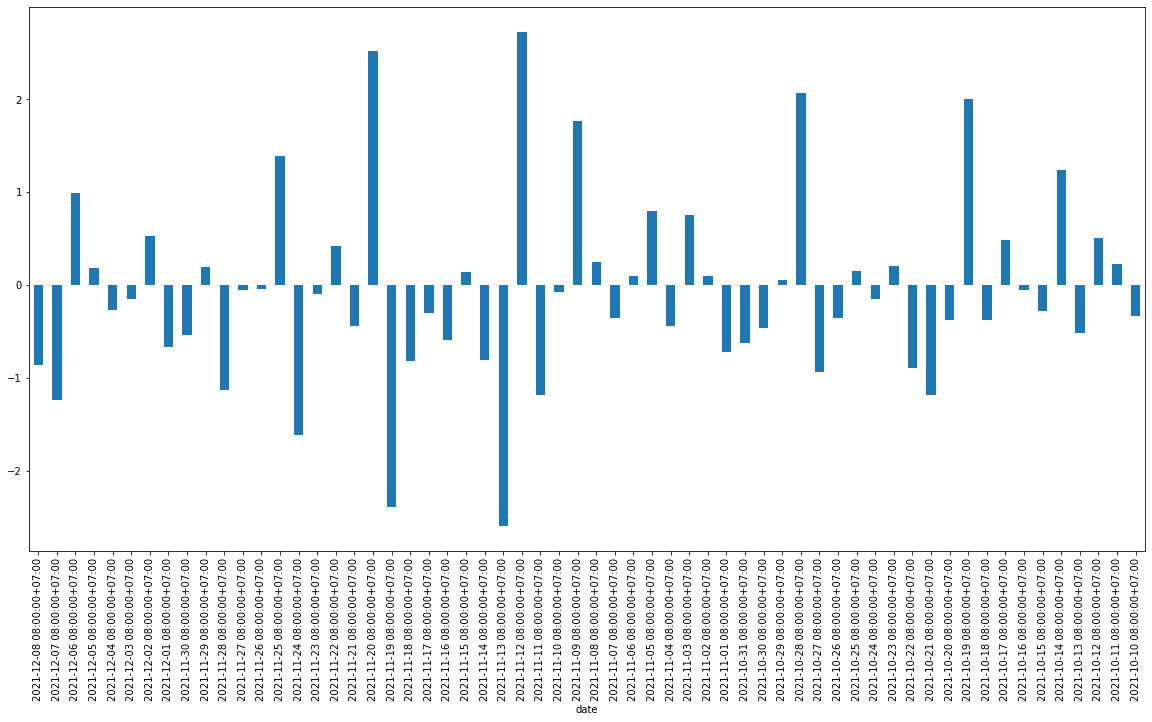

<Figure size 720x720 with 0 Axes>

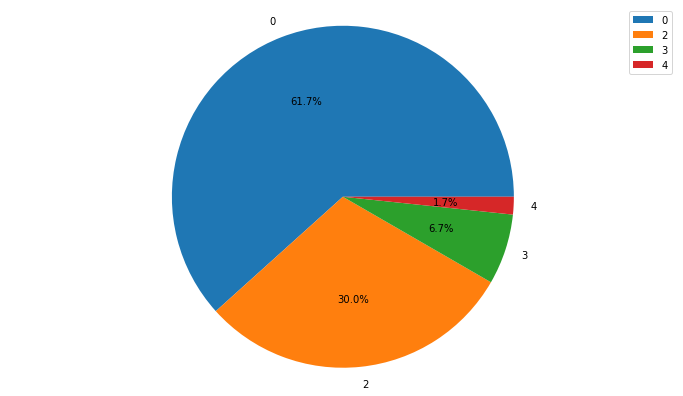

type_continuous_8
0    37
2    18
3     4
4     1
dtype: int64


In [11]:
hour_observe = 8

data_price_8 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 9
________________________________
count    30.000000
mean      0.565264
std       0.630259
min       0.000000
25%       0.223309
50%       0.374014
75%       0.697435
max       3.088153
Name: hour_return, dtype: float64
16.957922498857652
+++
count    30.000000
mean     -0.701278
std       0.503683
min      -1.874003
25%      -1.019963
50%      -0.559199
75%      -0.285353
max      -0.107066
Name: hour_return, dtype: float64
-21.038350822328972
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


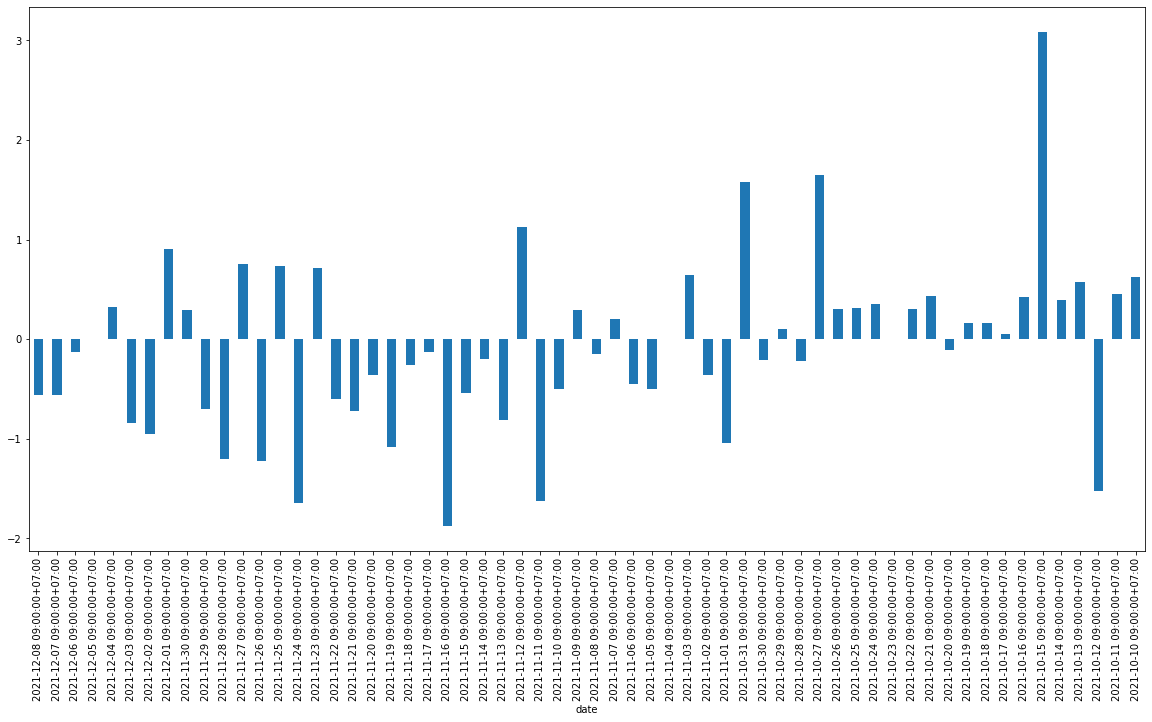

<Figure size 720x720 with 0 Axes>

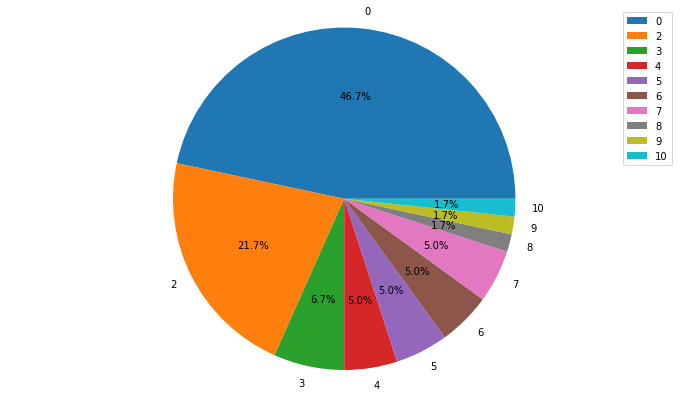

type_continuous_9
0     28
2     13
3      4
4      3
5      3
6      3
7      3
8      1
9      1
10     1
dtype: int64


In [12]:
hour_observe = 9

data_price_9 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 10
________________________________
count    29.000000
mean      0.571577
std       0.558555
min       0.000000
25%       0.166389
50%       0.428954
75%       0.899947
max       2.020619
Name: hour_return, dtype: float64
16.57574266617338
+++
count    31.000000
mean     -0.833991
std       1.019641
min      -4.981050
25%      -0.814751
50%      -0.500751
75%      -0.272683
max      -0.061843
Name: hour_return, dtype: float64
-25.853710917467463
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


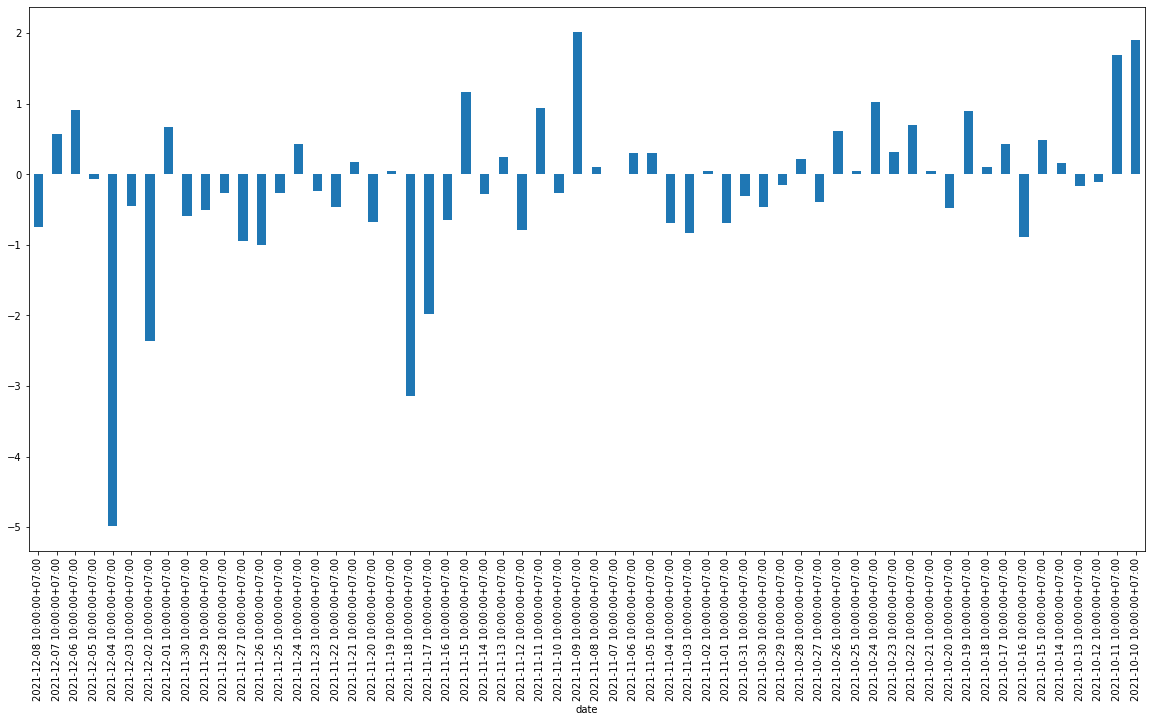

<Figure size 720x720 with 0 Axes>

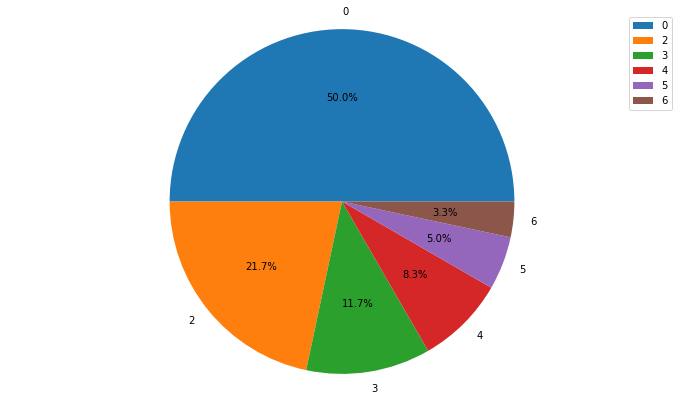

type_continuous_10
0    30
2    13
3     7
4     5
5     3
6     2
dtype: int64


In [13]:
hour_observe = 10

data_price_10 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 11
________________________________
count    27.000000
mean      0.651503
std       0.764086
min       0.089646
25%       0.226824
50%       0.379404
75%       0.676191
max       3.614458
Name: hour_return, dtype: float64
17.590589083965146
+++
count    33.000000
mean     -0.611512
std       0.901069
min      -5.005688
25%      -0.591716
50%      -0.355872
75%      -0.181357
max      -0.039108
Name: hour_return, dtype: float64
-20.17988291168917
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


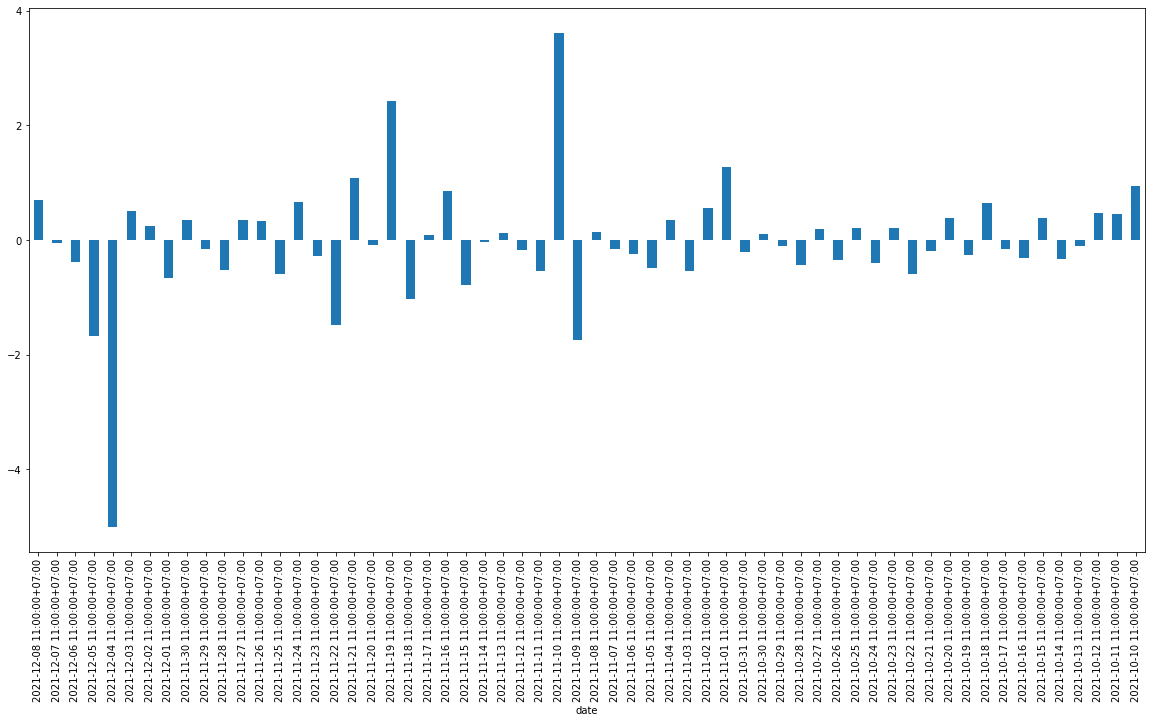

<Figure size 720x720 with 0 Axes>

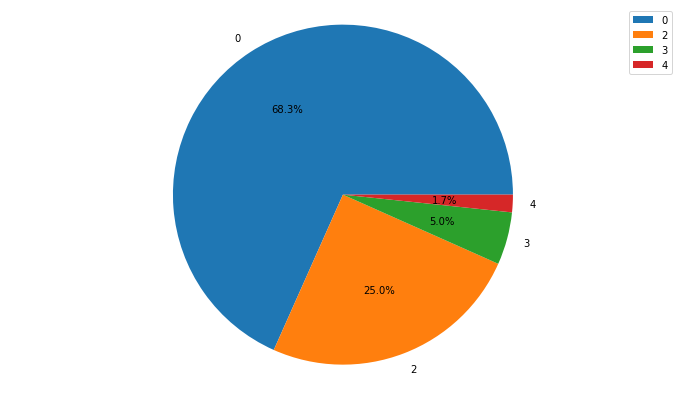

type_continuous_11
0    41
2    15
3     3
4     1
dtype: int64


In [14]:
hour_observe = 11

data_price_11 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 12
________________________________
count    26.000000
mean      0.630908
std       0.471246
min       0.047148
25%       0.280474
50%       0.547601
75%       0.918849
max       2.047952
Name: hour_return, dtype: float64
16.403610567529086
+++
count    34.000000
mean     -0.881267
std       1.399654
min      -7.904192
25%      -0.785837
50%      -0.459453
75%      -0.206652
max      -0.040486
Name: hour_return, dtype: float64
-29.96307706697006
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


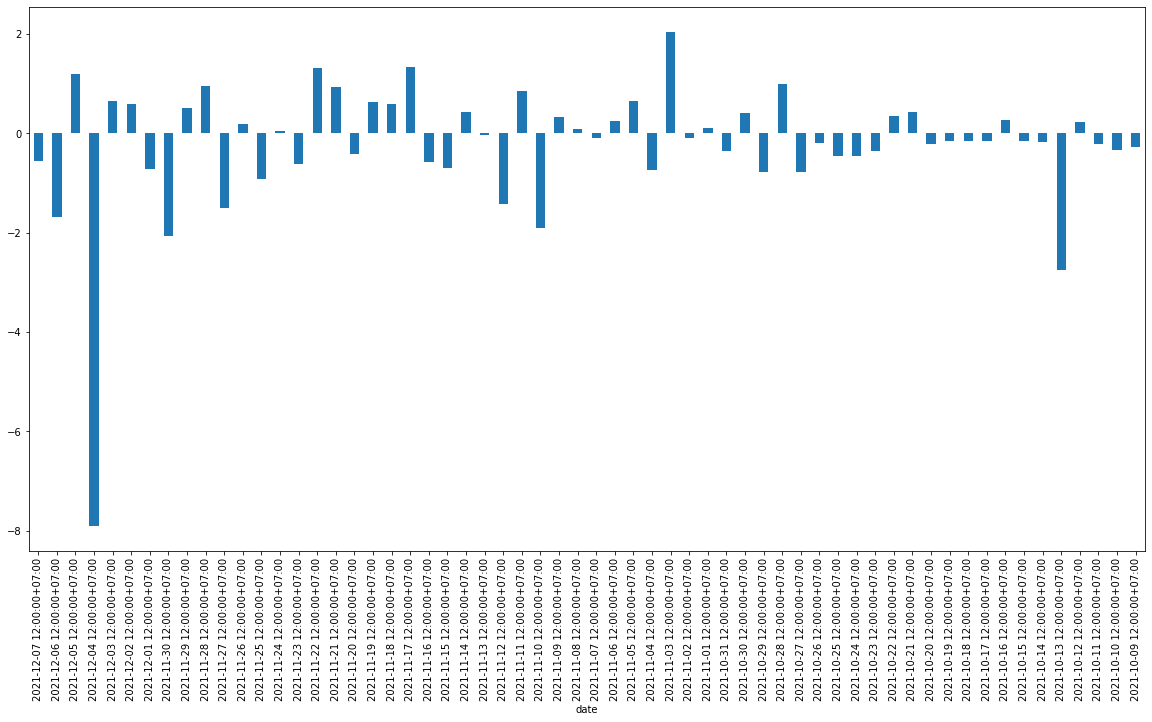

<Figure size 720x720 with 0 Axes>

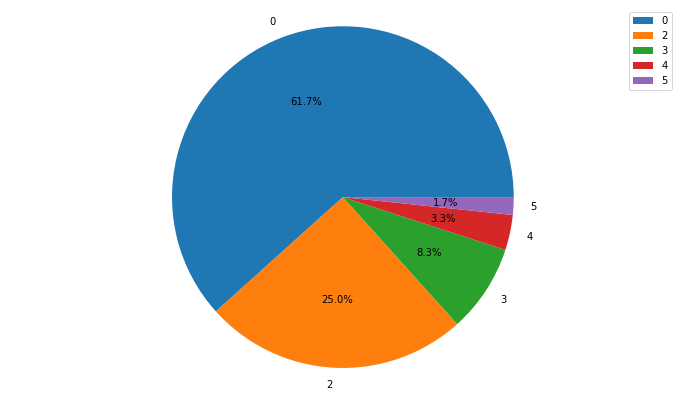

type_continuous_12
0    37
2    15
3     5
4     2
5     1
dtype: int64


In [15]:
hour_observe = 12

data_price_12 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 13
________________________________
count    32.000000
mean      0.601216
std       0.638517
min       0.000000
25%       0.215918
50%       0.463339
75%       0.703660
max       3.286206
Name: hour_return, dtype: float64
19.23889698010937
+++
count    28.000000
mean     -0.526756
std       0.469409
min      -1.783355
25%      -0.675815
50%      -0.384093
75%      -0.202069
max      -0.051733
Name: hour_return, dtype: float64
-14.74915972316655
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


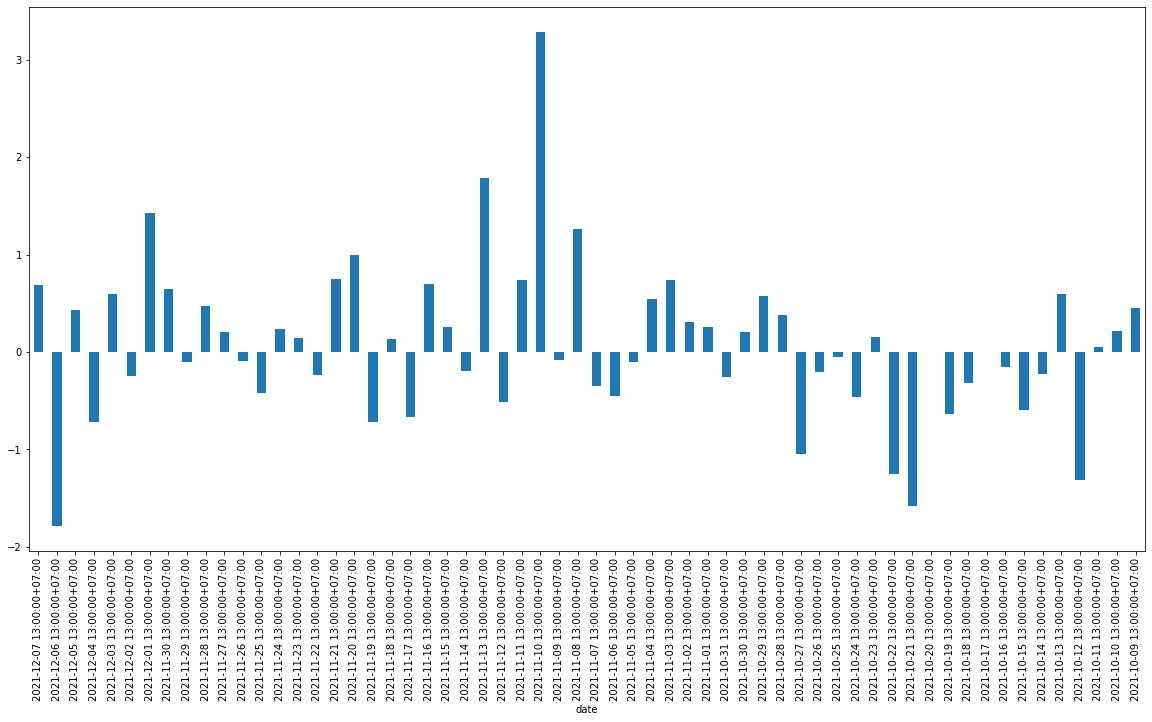

<Figure size 720x720 with 0 Axes>

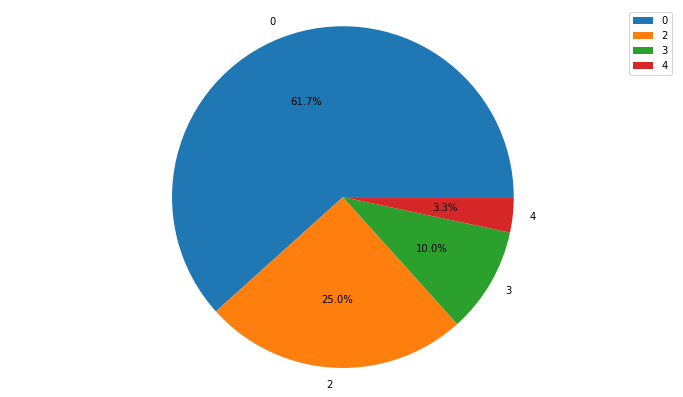

type_continuous_13
0    37
2    15
3     6
4     2
dtype: int64


In [16]:
hour_observe = 13

data_price_13 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 14
________________________________
count    26.000000
mean      0.626430
std       0.632009
min       0.000000
25%       0.159095
50%       0.314665
75%       1.075291
max       2.117013
Name: hour_return, dtype: float64
16.28717284024695
+++
count    34.000000
mean     -0.811141
std       0.792544
min      -4.214752
25%      -0.987143
50%      -0.613758
75%      -0.319727
max      -0.040535
Name: hour_return, dtype: float64
-27.57879729291713
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


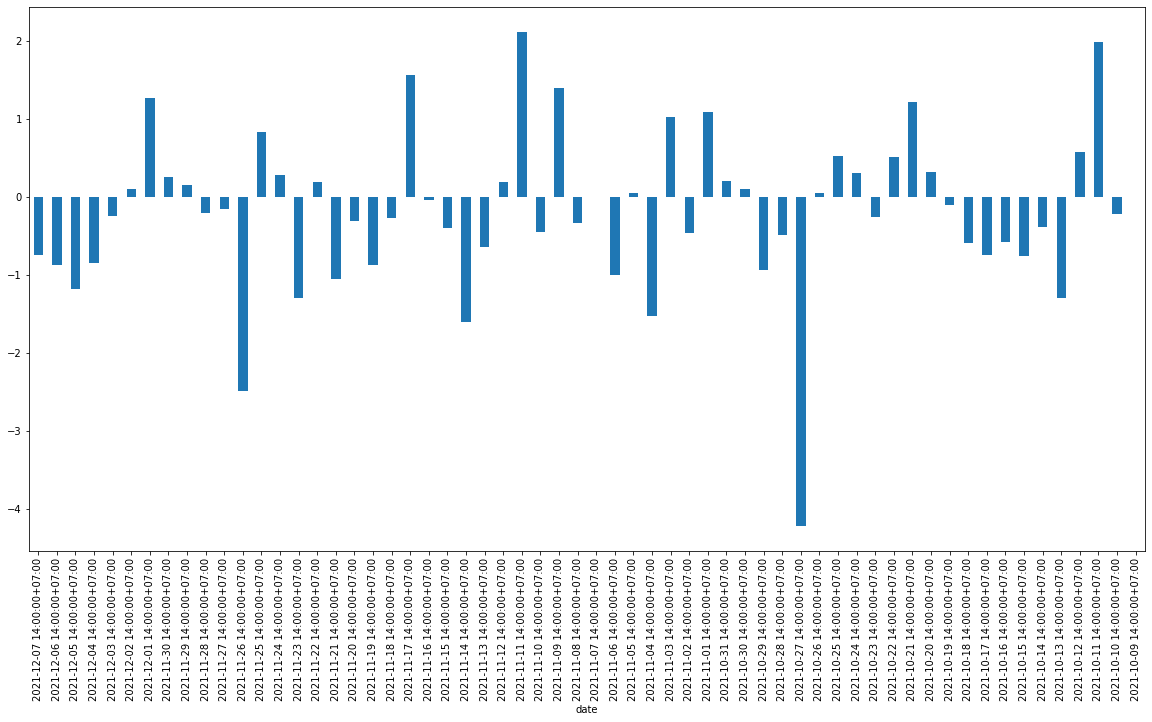

<Figure size 720x720 with 0 Axes>

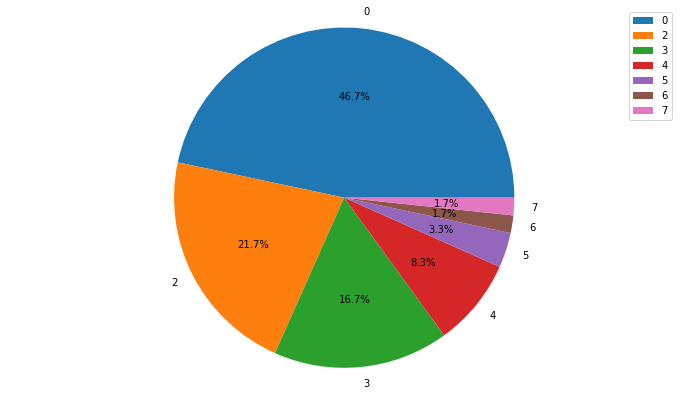

type_continuous_14
0    28
2    13
3    10
4     5
5     2
6     1
7     1
dtype: int64


In [17]:
hour_observe = 14

data_price_14 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 15
________________________________
count    35.000000
mean      0.694341
std       0.864607
min       0.000000
25%       0.197353
50%       0.360848
75%       0.792702
max       3.512195
Name: hour_return, dtype: float64
24.30193797671487
+++
count    25.000000
mean     -1.024924
std       1.400960
min      -6.947070
25%      -0.966902
50%      -0.775996
75%      -0.365497
max      -0.050684
Name: hour_return, dtype: float64
-25.623106945206242
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


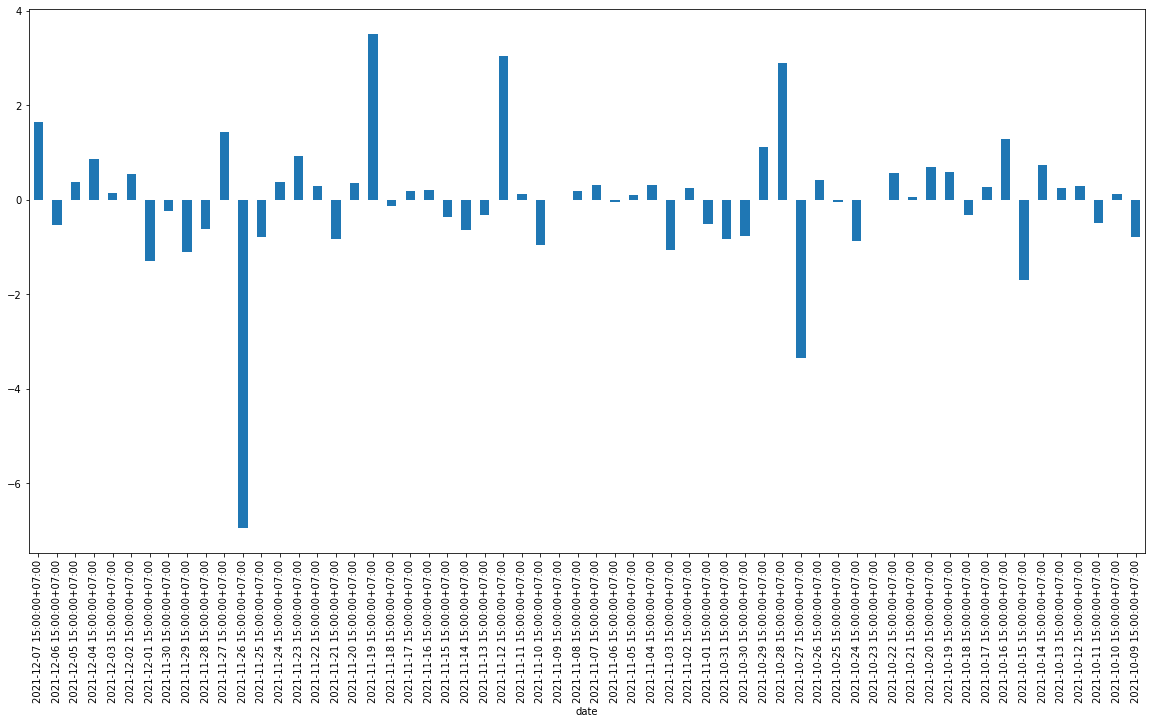

<Figure size 720x720 with 0 Axes>

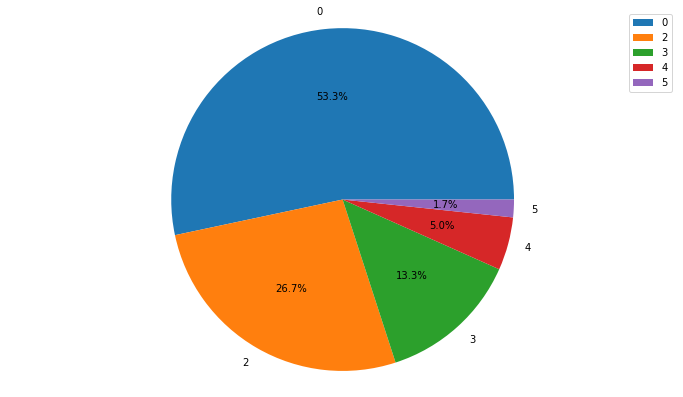

type_continuous_15
0    32
2    16
3     8
4     3
5     1
dtype: int64


In [18]:
hour_observe = 15

data_price_15 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 16
________________________________
count    33.000000
mean      0.528606
std       0.513636
min       0.039904
25%       0.251762
50%       0.337965
75%       0.611189
max       2.429150
Name: hour_return, dtype: float64
17.443981802754198
+++
count    27.000000
mean     -1.158845
std       1.157558
min      -4.628633
25%      -1.590582
50%      -0.803213
75%      -0.278449
max      -0.097561
Name: hour_return, dtype: float64
-31.28881725544963
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


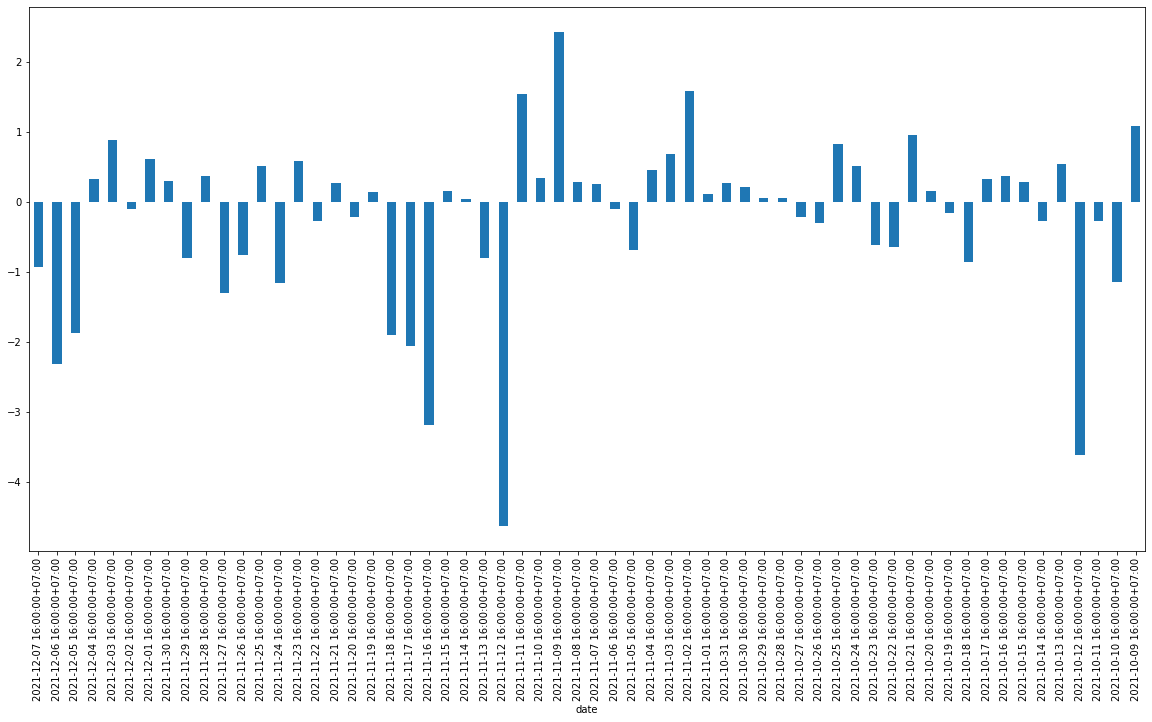

<Figure size 720x720 with 0 Axes>

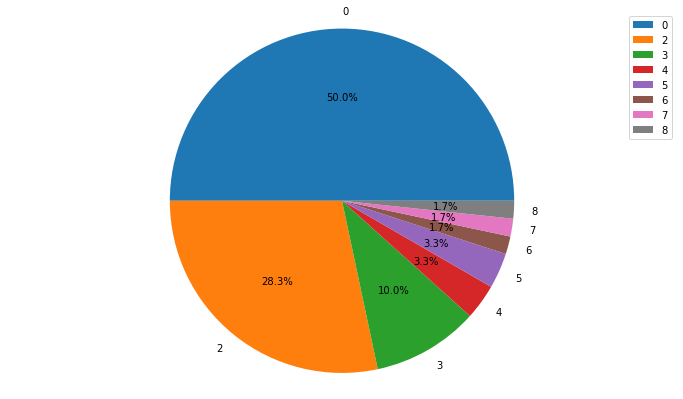

type_continuous_16
0    30
2    17
3     6
4     2
5     2
6     1
7     1
8     1
dtype: int64


In [19]:
hour_observe = 16

data_price_16 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 17
________________________________
count    29.000000
mean      0.827274
std       1.058065
min       0.000000
25%       0.197922
50%       0.560938
75%       0.837989
max       4.263207
Name: hour_return, dtype: float64
23.99095724933133
+++
count    31.000000
mean     -0.601687
std       0.501241
min      -2.256582
25%      -0.824227
50%      -0.491071
75%      -0.214508
max      -0.053619
Name: hour_return, dtype: float64
-18.65229512266253
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


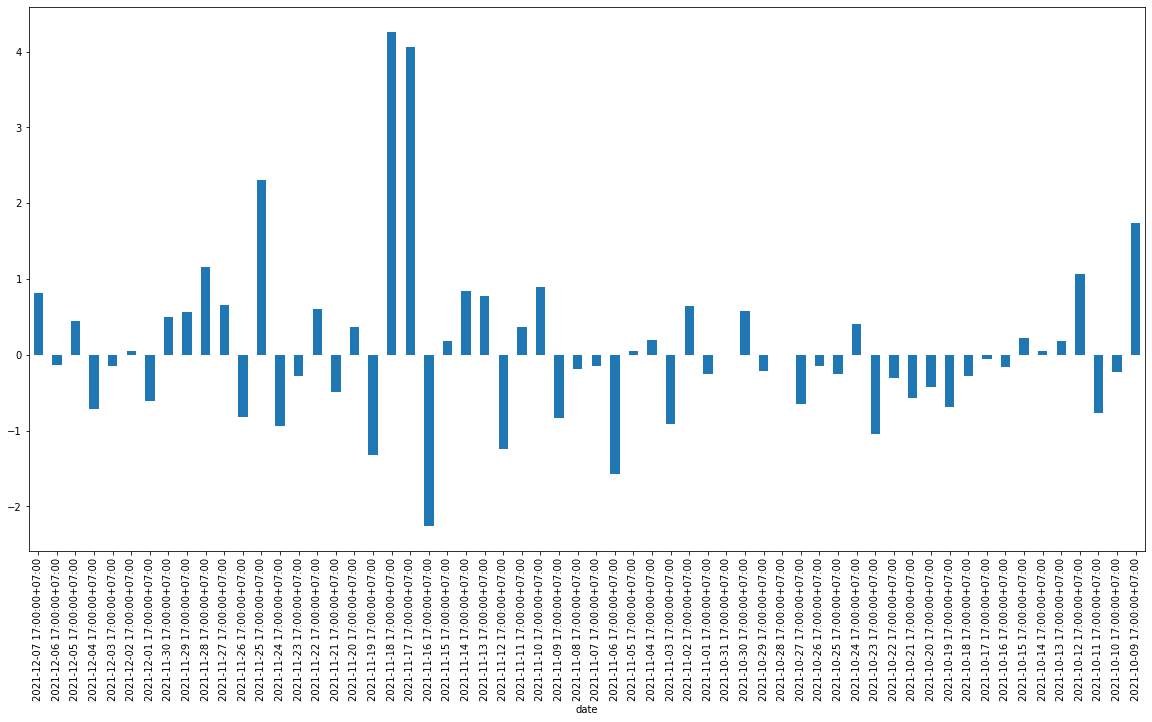

<Figure size 720x720 with 0 Axes>

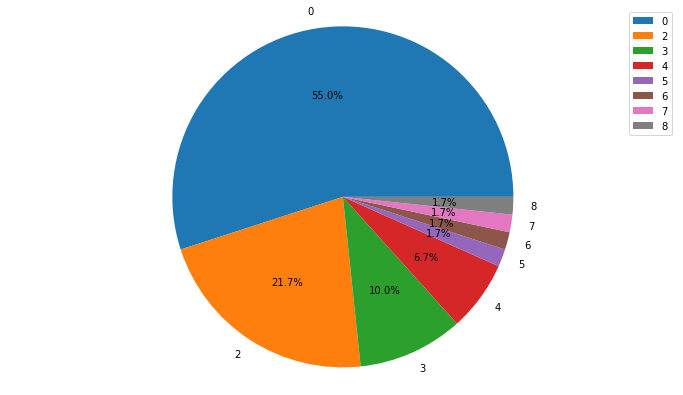

type_continuous_17
0    33
2    13
3     6
4     4
5     1
6     1
7     1
8     1
dtype: int64


In [20]:
hour_observe = 17

data_price_17 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 18
________________________________
count    25.000000
mean      1.193196
std       1.491378
min       0.000000
25%       0.386100
50%       0.584007
75%       1.240376
max       6.790353
Name: hour_return, dtype: float64
29.829888442350885
+++
count    35.000000
mean     -0.767222
std       0.670467
min      -3.111111
25%      -1.060081
50%      -0.536585
75%      -0.295985
max      -0.047687
Name: hour_return, dtype: float64
-26.852753798347766
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


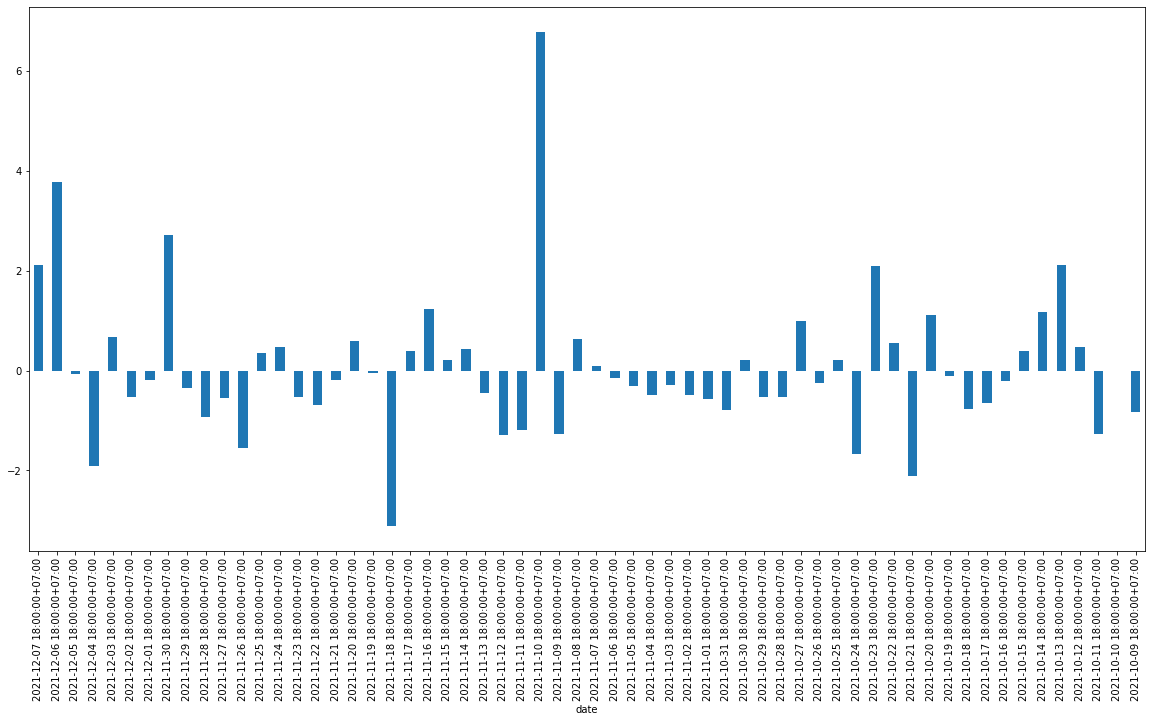

<Figure size 720x720 with 0 Axes>

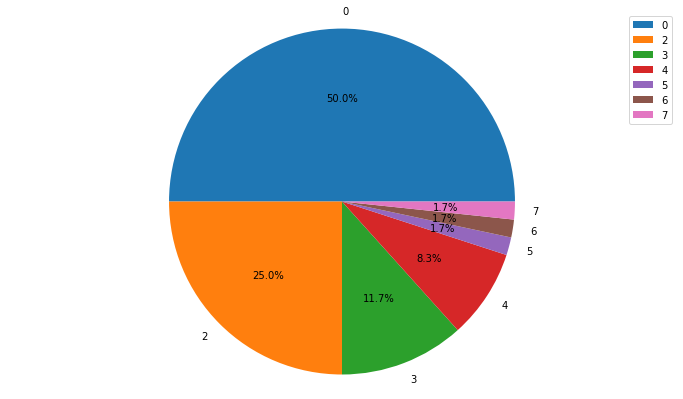

type_continuous_18
0    30
2    15
3     7
4     5
5     1
6     1
7     1
dtype: int64


In [21]:
hour_observe = 18

data_price_18 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 19
________________________________
count    31.000000
mean      0.692537
std       0.876658
min       0.000000
25%       0.156538
50%       0.334262
75%       0.754282
max       3.188145
Name: hour_return, dtype: float64
21.468644657916258
+++
count    29.000000
mean     -0.694504
std       0.669219
min      -2.292683
25%      -0.934230
50%      -0.580833
75%      -0.208442
max      -0.046620
Name: hour_return, dtype: float64
-20.140629997795713
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


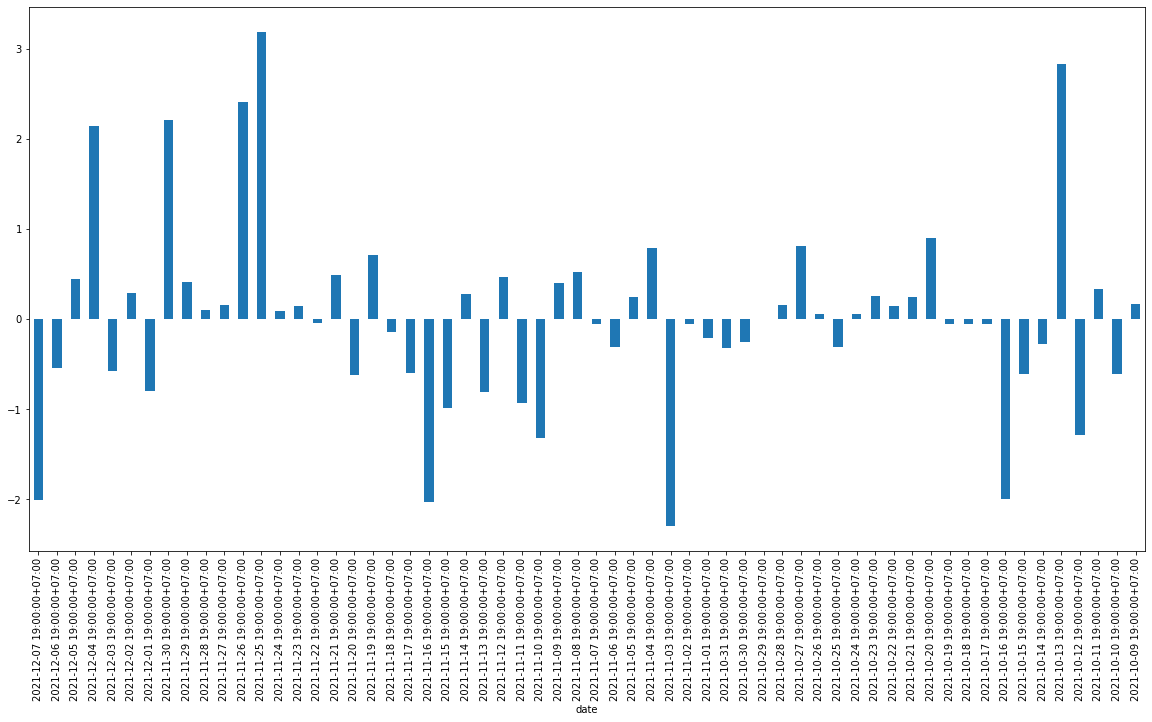

<Figure size 720x720 with 0 Axes>

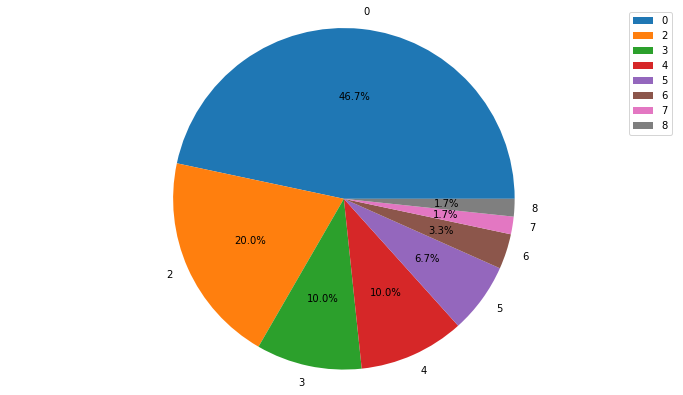

type_continuous_19
0    28
2    12
3     6
4     6
5     4
6     2
7     1
8     1
dtype: int64


In [22]:
hour_observe = 19

data_price_19 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 20
________________________________
count    35.000000
mean      1.141641
std       0.860357
min       0.110497
25%       0.438547
50%       0.917431
75%       1.729337
max       3.493976
Name: hour_return, dtype: float64
39.957424438036576
+++
count    25.000000
mean     -0.737646
std       0.666414
min      -3.314607
25%      -0.921829
50%      -0.615700
75%      -0.362506
max      -0.048685
Name: hour_return, dtype: float64
-18.441138695810743
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


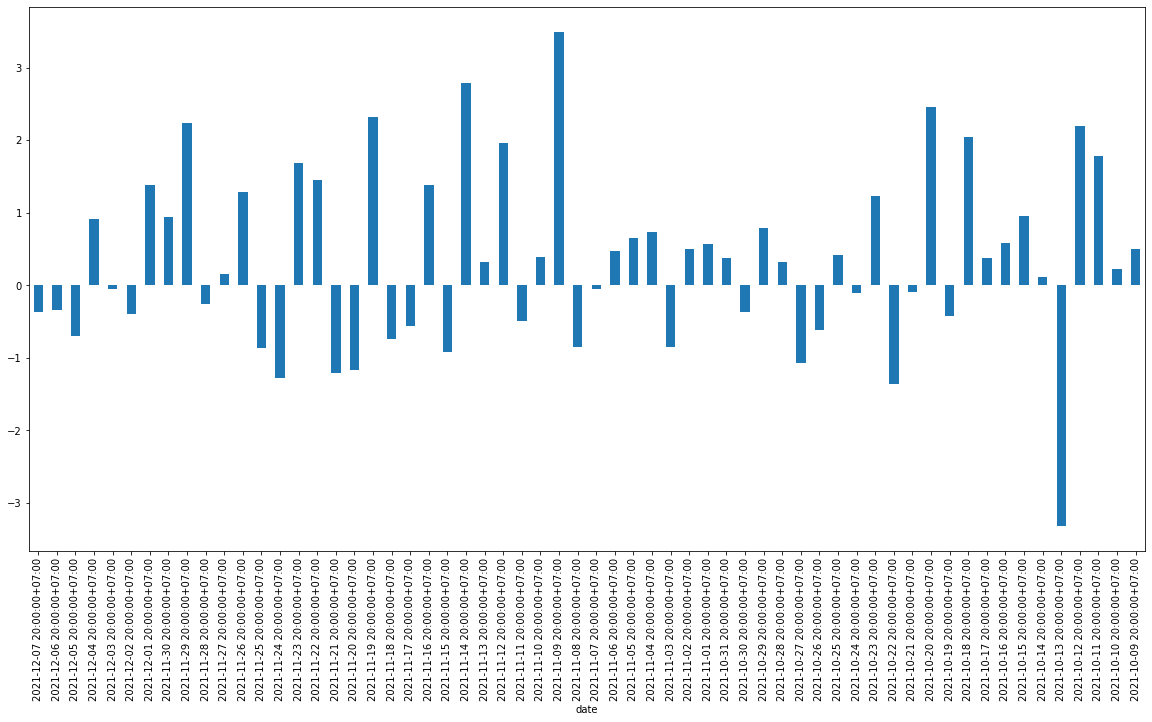

<Figure size 720x720 with 0 Axes>

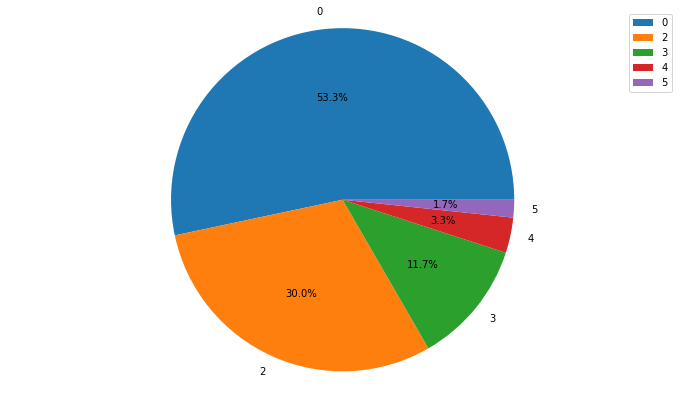

type_continuous_20
0    32
2    18
3     7
4     2
5     1
dtype: int64


In [23]:
hour_observe = 20

data_price_20 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 21
________________________________
count    28.000000
mean      1.007081
std       1.127002
min       0.000000
25%       0.260807
50%       0.802199
75%       1.288486
max       5.596107
Name: hour_return, dtype: float64
28.19826619112078
+++
count    32.000000
mean     -0.866427
std       0.682063
min      -2.542912
25%      -1.146865
50%      -0.761166
75%      -0.303170
max      -0.087796
Name: hour_return, dtype: float64
-27.72566293363048
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


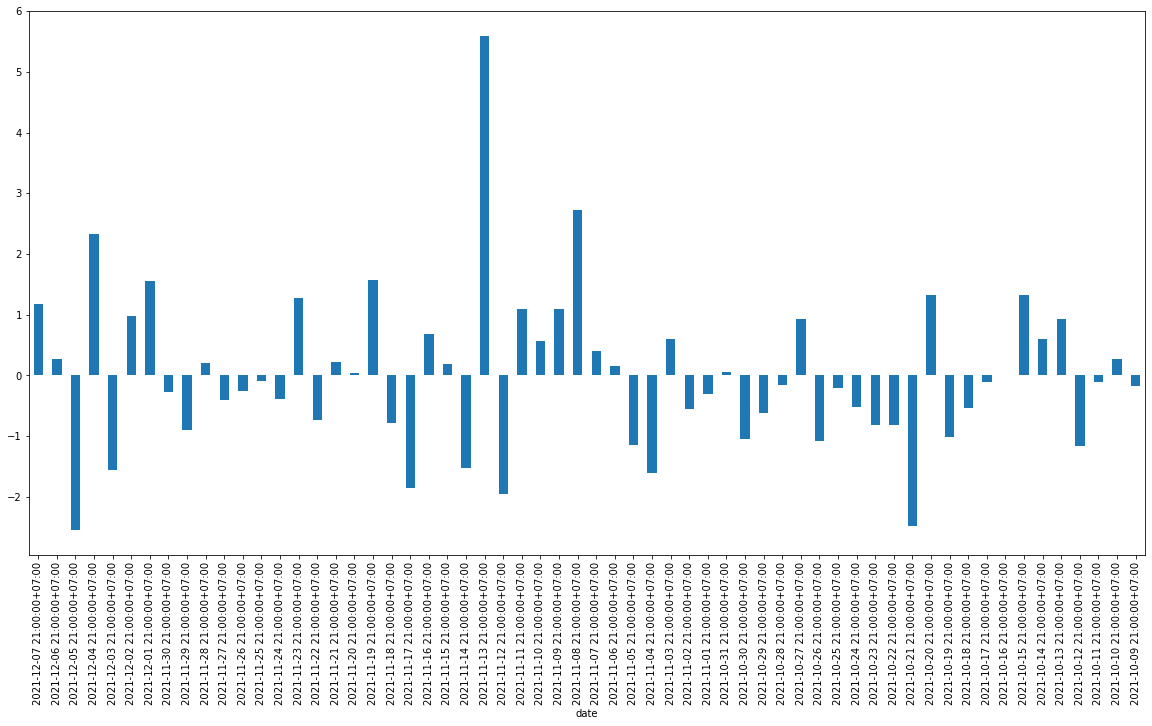

<Figure size 720x720 with 0 Axes>

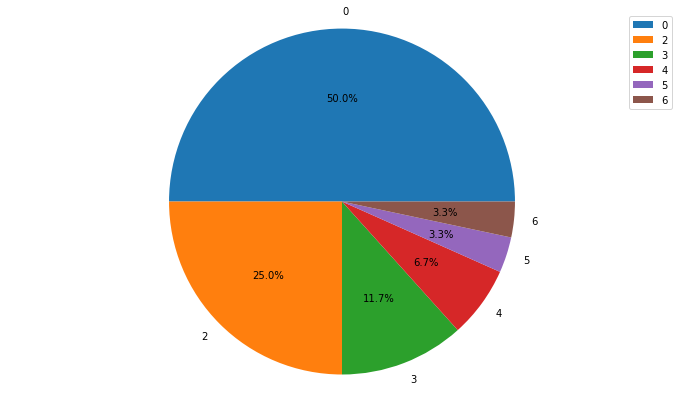

type_continuous_21
0    30
2    15
3     7
4     4
5     2
6     2
dtype: int64


In [24]:
hour_observe = 21

data_price_21 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 22
________________________________
count    28.000000
mean      0.891291
std       0.785339
min       0.109051
25%       0.253181
50%       0.665495
75%       1.241966
max       2.987101
Name: hour_return, dtype: float64
24.956145216499934
+++
count    32.000000
mean     -0.893616
std       0.782094
min      -3.343582
25%      -1.221928
50%      -0.642555
75%      -0.332375
max      -0.053191
Name: hour_return, dtype: float64
-28.59570068664933
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


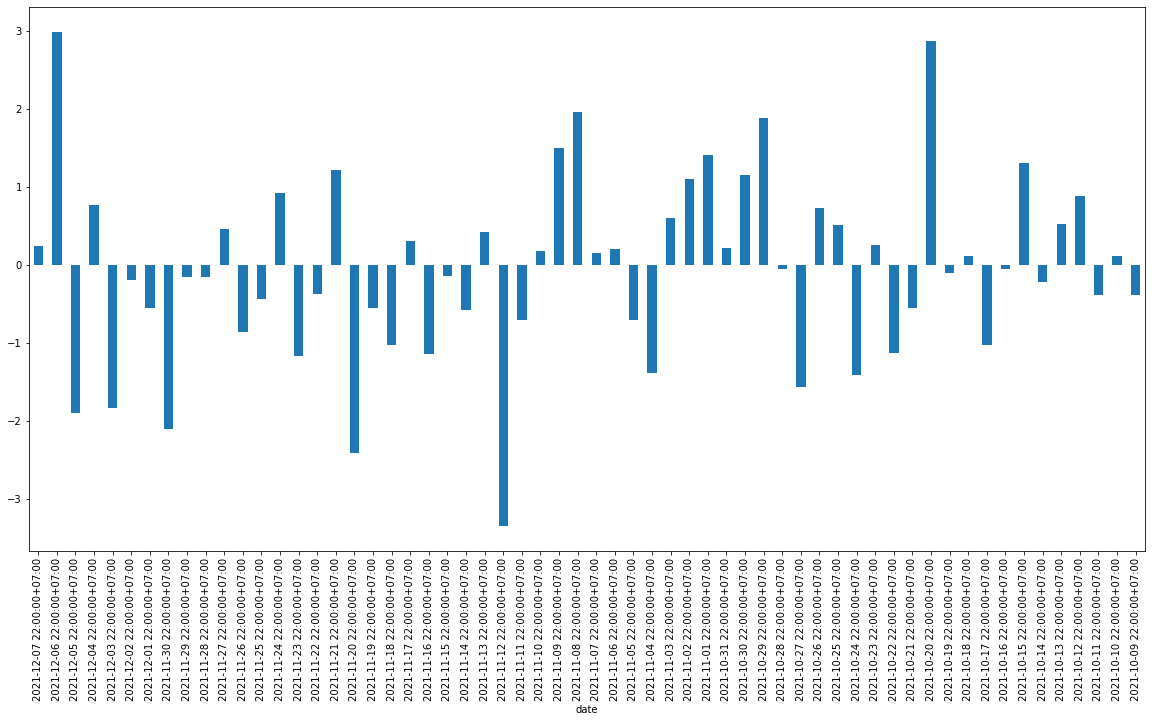

<Figure size 720x720 with 0 Axes>

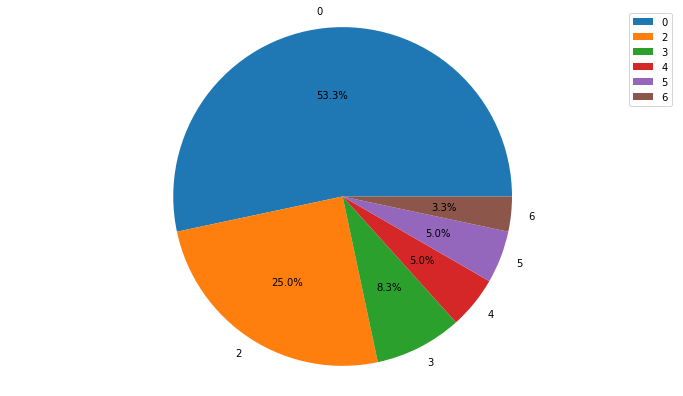

type_continuous_22
0    32
2    15
3     5
4     3
5     3
6     2
dtype: int64


In [25]:
hour_observe = 22

data_price_22 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 23
________________________________
count    31.000000
mean      0.792557
std       0.788563
min       0.000000
25%       0.223499
50%       0.527357
75%       1.065336
max       2.963362
Name: hour_return, dtype: float64
24.569273854466175
+++
count    29.000000
mean     -0.734006
std       0.660381
min      -2.781707
25%      -0.874404
50%      -0.544662
75%      -0.359159
max      -0.057274
Name: hour_return, dtype: float64
-21.28616908863481
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


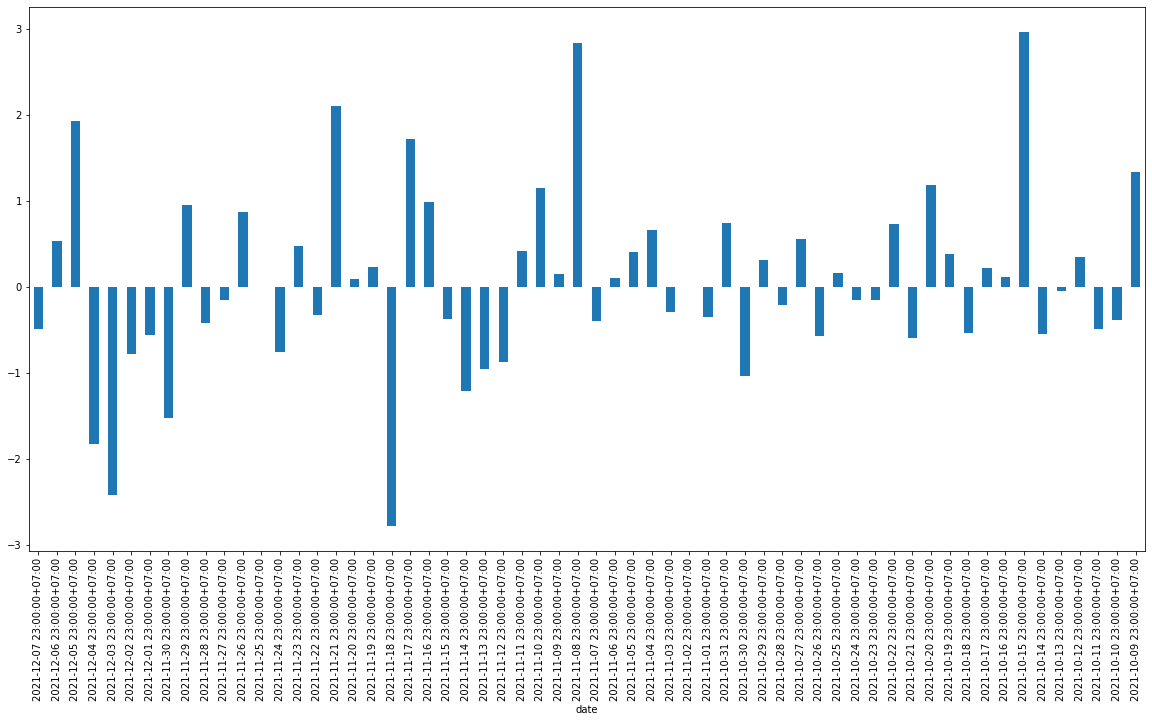

<Figure size 720x720 with 0 Axes>

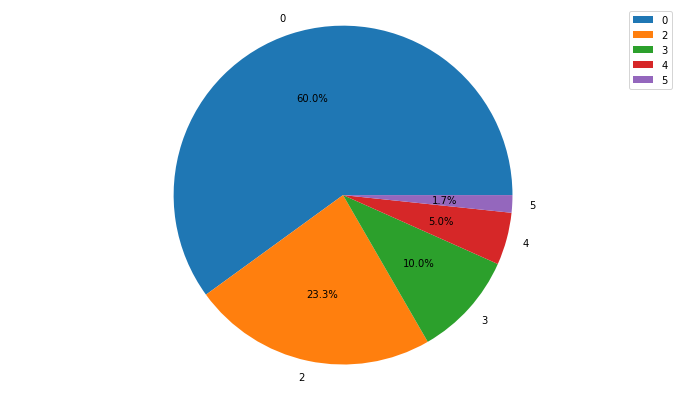

type_continuous_23
0    36
2    14
3     6
4     3
5     1
dtype: int64


In [26]:
hour_observe = 23

data_price_23 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)

Giờ 0
________________________________
count    29.000000
mean      0.886942
std       1.389878
min       0.000000
25%       0.271739
50%       0.449102
75%       0.883219
max       6.996047
Name: hour_return, dtype: float64
25.721313377645323
+++
count    31.000000
mean     -0.624293
std       0.408567
min      -1.916573
25%      -0.913007
50%      -0.599700
75%      -0.295352
max      -0.050201
Name: hour_return, dtype: float64
-19.353074511943685
____________________________________________________________


<ipython-input-2-cf925db37178>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


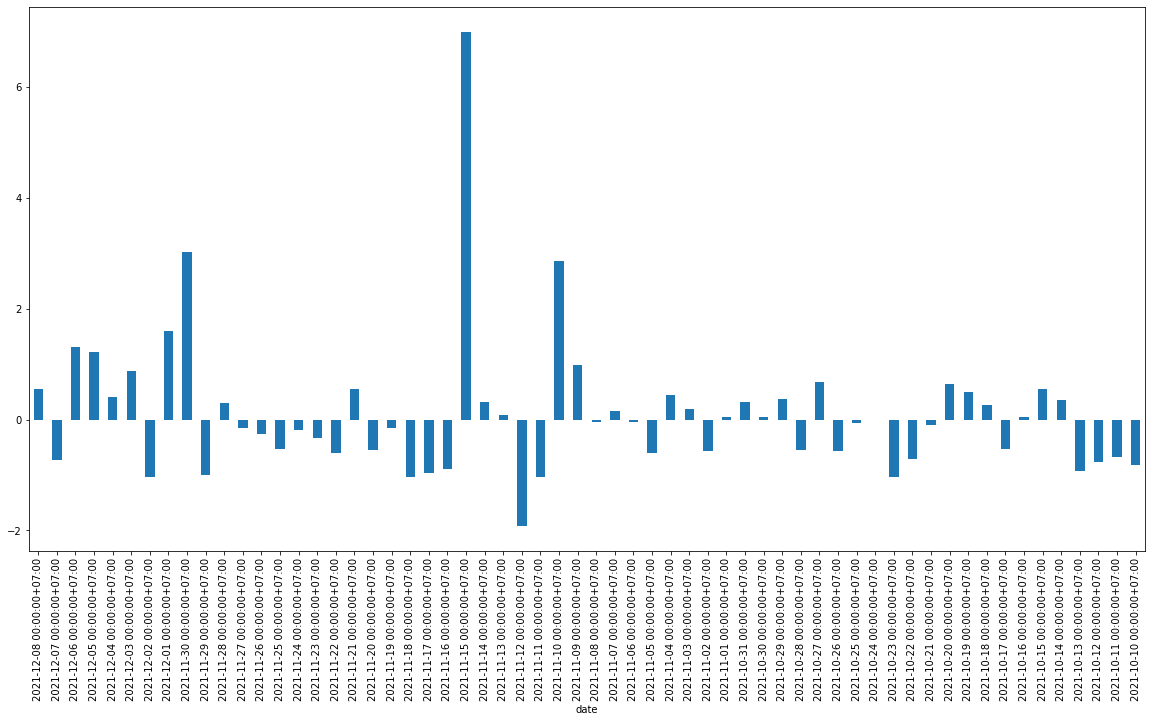

<Figure size 720x720 with 0 Axes>

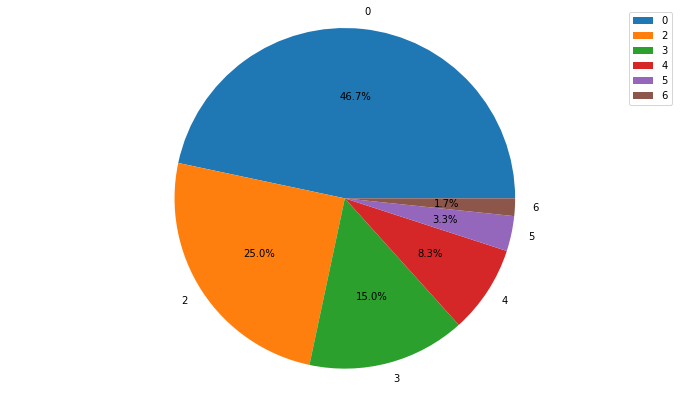

type_continuous_0
0    28
2    15
3     9
4     5
5     2
6     1
dtype: int64


In [27]:
hour_observe = 0

data_price_0 = data_prices[(data_prices['hour'] == hour_observe)]

report_by_hour(hour_observe)